# Notebook accompanying the manuscript 

# *Decision-Making strategies implemented in SolFinder 1.0 to identify eco-efficient aircraft trajectories: application study in AirTraf 3.0*

This Notebook produces all the Figures and Tables presented in the manuscript Castino et al. (2023), *Decision-Making strategies implemented in SolFinder 1.0 to identify eco-efficient aircraft trajectories: application study in AirTraf 3.0*, submitted to GMDD, 2023. 

Copyright 2023 Federica Castino 

Licensed under GNU LGPL-3.0-or-later 

***

### Table of content:
- [Packages](#Packages)
- [Figure 3](#Figure-3)
- [Figure 4](#Figure-3)
- [Figure 5](#Figure-3)
- [Figure 6](#Figure-3)
- [Figure 7](#Figure-3)
- [Figure 8](#Figure-3)
- [Figure 9](#Figure-3)
- [Figure 10](#Figure-3)
- [Figure 11](#Figure-3)
- [Figure 12](#Figure-3)
- [Tables](#Tables-in-GMDD-manuscript)

   
<hr style="border:2px solid gray"> </hr>


# Packages

In [1]:
#pip install solfinder

In [2]:
#pip install solfinder --upgrade

In [3]:
pip show solfinder

Name: solfinder
Version: 1.0.4
Summary: SolFinder 1.0.4
Home-page: UNKNOWN
Author: fcastino
Author-email: f.castino@tudelft.nl
License: GNU LGPLv3
Location: c:\programs\anaconda3\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [43]:
#%% Imort packages and set general settings

import glob
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      'font.weight': 'bold'}
plt.rcParams.update(rc)
mpl.rcParams.update(rc)
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']

import seaborn as sns
sns.set_theme(style="white", 
              font_scale=1.5)
sns.set_style({'font.family':'serif', 
               'font.serif':'cmr10',
               'axes.spines.left': True,
               'axes.spines.bottom': True})

import xarray as xr
xr.set_options(display_style="html")

from texttable import Texttable
import latextable

import os
os.environ['PROJ_LIB'] = r'C:/programs/Anaconda3/Library/share'
from mpl_toolkits.basemap import Basemap

import warnings
warnings.simplefilter("ignore") 

import solfinder.MCDM as mcdm



In [5]:
pip show numpy

Name: numpyNote: you may need to restart the kernel to use updated packages.
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: c:\programs\anaconda3\lib\site-packages
Requires: 
Required-by: -atplotlib, xarray, wrf-python, tables, statsmodels, seaborn, scitools-iris, scipy, scikit-learn, PyWavelets, pykdtree, patsy, pandas, numexpr, numba, netCDF4, moviepy, mkl-random, mkl-fft, MetPy, matplotlib, imageio, h5py, fast-histogram, control, cftime, cfgrib, cf-units, Cartopy, Bottleneck, bokeh, bkcharts, basemap, astropy



# Figure 3

Number of Pareto fronts: 100
26 : this is the only recommended solution
23 : this is the only recommended solution
44 : this is the only recommended solution
72 : this is the only recommended solution


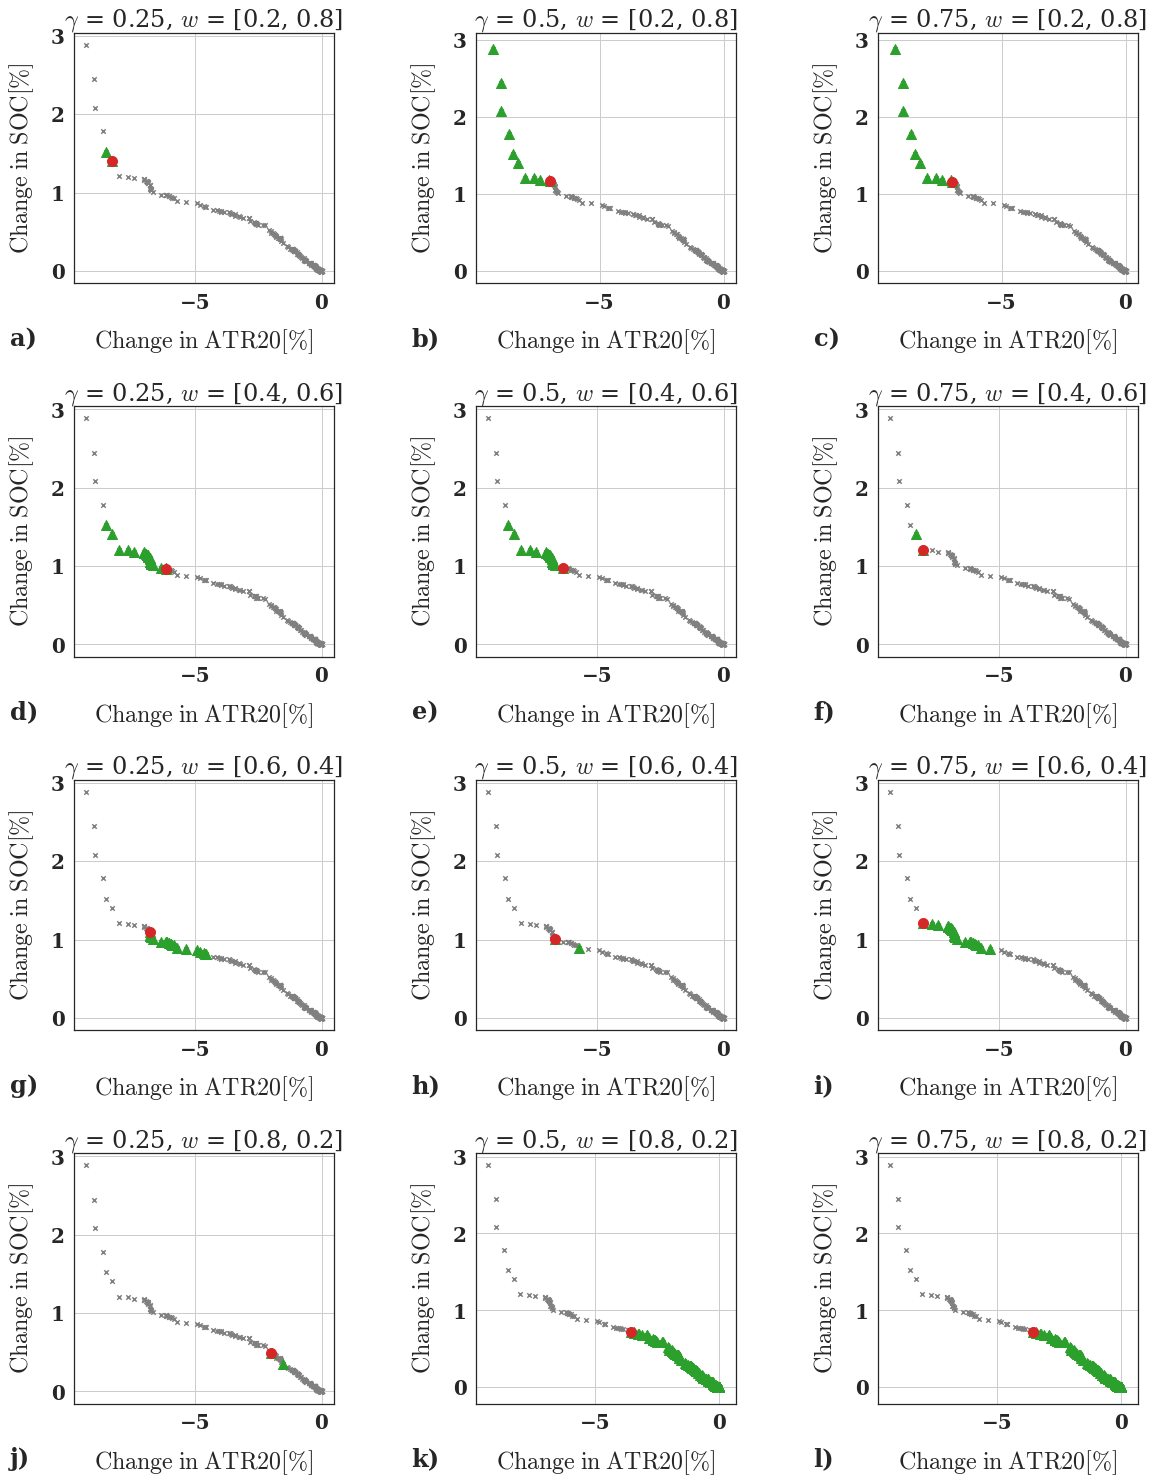

In [6]:
fnames_1day = glob.glob('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1day/POBJ_*.dat')
fnames_1day.sort()
data_1day = [np. loadtxt(f, unpack = True) for f in fnames_1day]
print('Number of Pareto fronts:', len(data_1day))

citypair=11
    
cp_soc = data_1day[citypair][0]
cp_atr = data_1day[citypair][1]

n_sol = len(cp_soc)

# Input: weights and parameter gamma

w1 = [0.2, 0.8]
w2 = [0.4, 0.6]
w3 = [0.6, 0.4]
w4 = [0.8, 0.2]

w = [w1, w2, w3, w4]

gamma1 = 0.25
gamma2 = 0.5
gamma3 = 0.75 

gamma = [gamma1, gamma2, gamma3]

fig, axs = plt.subplots(4, 3, figsize=(18,22))
letters = [chr(i) for i in range(97, 97+12, 1)]
fig.tight_layout(pad=5.0)
i=0

for i_w in range(4):
    
    for i_gamma in range(3):
    
        rec_sol_vikor, solution_found_with_vikor  = mcdm.VIKOR.solution_found_by_vikor(mcdm.VIKOR(), data_1day[citypair], gamma[i_gamma], w[i_w])

        
        axs[i_w, i_gamma].scatter(100*(cp_atr-max(cp_atr))/max(cp_atr), 
                                  100*(cp_soc-min(cp_soc))/min(cp_soc), 
                                  s=20, c='gray', marker='x')
        axs[i_w, i_gamma].scatter(100*(cp_atr[rec_sol_vikor]-max(cp_atr))/max(cp_atr),
                                  100*(cp_soc[rec_sol_vikor]-min(cp_soc))/min(cp_soc),
                                  s=100,  c='tab:green', marker='^')
        axs[i_w, i_gamma].scatter(100*(cp_atr[solution_found_with_vikor]-max(cp_atr))/max(cp_atr),
                                  100*(cp_soc[solution_found_with_vikor]-min(cp_soc))/min(cp_soc), 
                                  s=100,  c='tab:red')

        axs[i_w, i_gamma].set_xlabel(r'$\mathrm{Change \; in \; ATR20 [\%]}$', fontsize=24, labelpad=15)
        axs[i_w, i_gamma].set_ylabel(r'$\mathrm{Change \; in \; SOC [\%]}$', fontsize=24, labelpad=15)
        axs[i_w, i_gamma].grid(True)
        axs[i_w, i_gamma].tick_params(axis='both', which='major', labelsize=20)
        axs[i_w, i_gamma].set_title('$\gamma$ = {}, $w$ = {}'.format(gamma[i_gamma], w[i_w]), fontsize=24)
        axs[i_w, i_gamma].annotate(letters[i]+')', xy=(-0.25,-0.25), xycoords='axes fraction', fontsize=24 )
        i+=1
        
plt.show()
        

# Figure 4

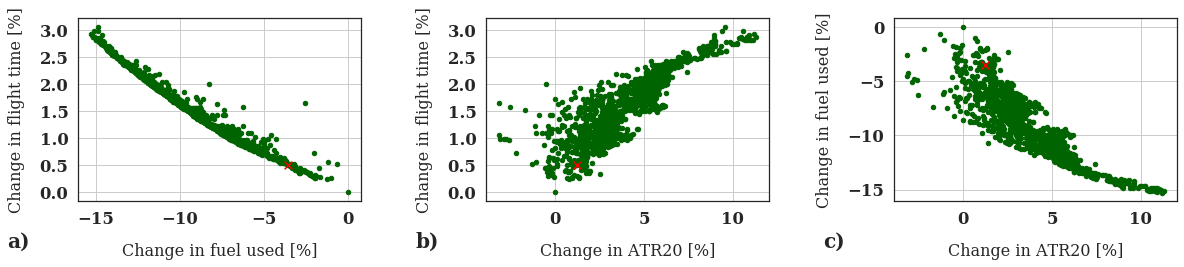

In [7]:
fnames_fig4 = glob.glob('./Data_SolFinder_GMDD_4TU/Triobjective_optimization_example.dat')
pobj_fig4 = np.loadtxt(fnames_fig4[0], unpack = True)
        
cp_time = pobj_fig4[0] # Flight time
cp_fuel = pobj_fig4[1] # Fuel used
cp_atrt = pobj_fig4[2] # ATR20 total 

#################
# Use Solfinder #
#################

# Find solution closes to a 0.5% increase in flight time
solution_found_with_target = mcdm.Target.solution_found_with_target(mcdm.Target(), 0.5, cp_time)

###########
# Figures #
###########

fig, axs = plt.subplots(1, 3, figsize=(18,5))
fig.tight_layout(pad=4.0)
index_min_time = np.argmin(cp_time)

axs[0].scatter(100*(cp_fuel-cp_fuel[index_min_time])/cp_fuel[index_min_time],
            100*(cp_time-cp_time[index_min_time])/cp_time[index_min_time],
            s=20, c='darkgreen')
axs[0].scatter(100*(cp_fuel[solution_found_with_target]-cp_fuel[index_min_time])/cp_fuel[index_min_time],
            100*(cp_time[solution_found_with_target]-min(cp_time))/min(cp_time),
            s=60,  c='red', marker='x')
axs[0].set_xlabel(r'Change in fuel used [%]', fontsize=16, labelpad=15)
axs[0].set_ylabel(r'Change in flight time [%]', fontsize=16, labelpad=15)
axs[0].yaxis.set_major_locator(MultipleLocator(0.5))
axs[0].grid(True)    
axs[0].annotate('a)', xy=(-0.25,-0.25), xycoords='axes fraction', fontsize=20 )

########################################

axs[1].scatter(100*(cp_atrt-cp_atrt[index_min_time])/cp_atrt[index_min_time],
            100*(cp_time-cp_time[index_min_time])/cp_time[index_min_time],
            s=20, c='darkgreen')
axs[1].scatter(100*(cp_atrt[solution_found_with_target]-cp_atrt[index_min_time])/cp_atrt[index_min_time],
            100*(cp_time[solution_found_with_target]-min(cp_time))/min(cp_time),
            s=60,  c='red', marker='x')
axs[1].set_xlabel(r'Change in ATR20 [%]', fontsize=16, labelpad=15)
axs[1].set_ylabel(r'Change in flight time [%]', fontsize=16, labelpad=15)
axs[1].yaxis.set_major_locator(MultipleLocator(0.5))
axs[1].grid(True)   
axs[1].annotate('b)', xy=(-0.25,-0.25), xycoords='axes fraction', fontsize=20 )

########################################

axs[2].scatter(100*(cp_atrt-cp_atrt[index_min_time])/cp_atrt[index_min_time],
            100*(cp_fuel-cp_fuel[index_min_time])/cp_fuel[index_min_time],
            s=20, c='darkgreen')
axs[2].scatter(100*(cp_atrt[solution_found_with_target]-cp_atrt[index_min_time])/cp_atrt[index_min_time],
            100*(cp_fuel[solution_found_with_target]-cp_fuel[index_min_time])/cp_fuel[index_min_time],
            s=60,  c='red', marker='x')
axs[2].set_xlabel(r'Change in ATR20 [%]', fontsize=16, labelpad=15)
axs[2].set_ylabel(r'Change in fuel used [%]', fontsize=16, labelpad=15)
axs[2].grid(True)    
axs[2].annotate('c)', xy=(-0.25,-0.25), xycoords='axes fraction', fontsize=20 )

plt.show()

# Figure 5

In [8]:
# Dataset used in Section 3 and 4

ds_airtraf_atr = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/atr/atr*airtraf_ac.nc')
ds_airtraf_soc = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/soc/soc*airtraf_ac.nc')
ds_airtraf_V02 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/V02/V02*airtraf_ac.nc')
ds_airtraf_V04 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/V04/V04*airtraf_ac.nc')
ds_airtraf_V06 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/V06/V06*airtraf_ac.nc')
ds_airtraf_V07 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/V07/V07*airtraf_ac.nc')
ds_airtraf_V08 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/V08/V08*airtraf_ac.nc')
ds_airtraf_V09 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/V09/V09*airtraf_ac.nc')
ds_airtraf_f05 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/f05/f05*airtraf_ac.nc')
ds_airtraf_f10 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/f10/f10*airtraf_ac.nc')
ds_airtraf_f20 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/f20/f20*airtraf_ac.nc')
ds_airtraf_f30 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/f30/f30*airtraf_ac.nc')
ds_airtraf_h71 = xr.open_mfdataset('./Data_SolFinder_GMDD_4TU/biobj_atr_soc_1month/h_V07_f10/h*airtraf_ac.nc')

{-20: ([<matplotlib.lines.Line2D at 0x1ba5019fba8>],
  [Text(8905.559263461886, -89055.59263461886, '20°W')]),
 0: ([<matplotlib.lines.Line2D at 0x1ba501bd3c8>],
  [Text(2235295.375128933, -89055.59263461886, '0°')]),
 20: ([<matplotlib.lines.Line2D at 0x1ba501bdc88>],
  [Text(4461685.190994405, -89055.59263461886, '20°E')]),
 40: ([<matplotlib.lines.Line2D at 0x1ba501bd7f0>],
  [Text(6688075.006859876, -89055.59263461886, '40°E')])}

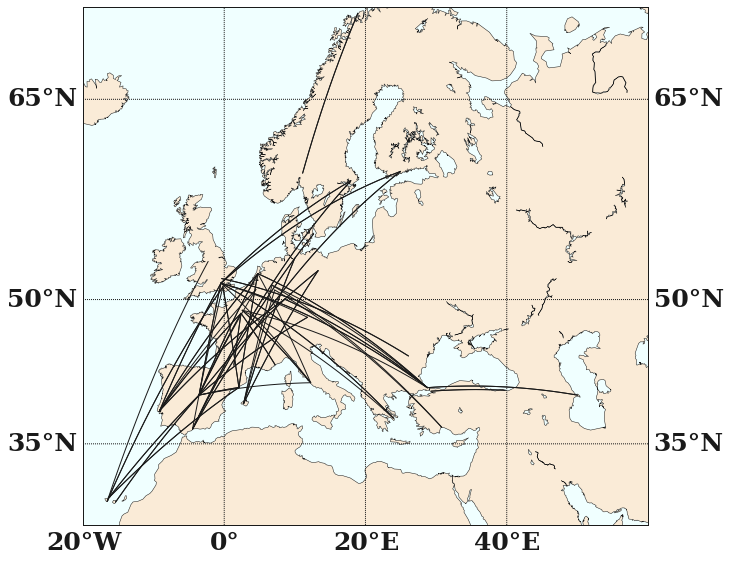

In [9]:
fig=plt.figure(figsize=(12, 9))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-20.,llcrnrlat=25.,urcrnrlon=60.,urcrnrlat=70.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc')

for citypair in range(85):
    
        lon_cost = ds_airtraf_soc.routes_out.isel(AirTraf_properties=0, AirTraf_routes_out = citypair, time=-1).values 
        lat_cost = ds_airtraf_soc.routes_out.isel(AirTraf_properties=1, AirTraf_routes_out = citypair, time=-1).values
        
        m.drawgreatcircle(lon_cost[0],lat_cost[0],lon_cost[-1],lat_cost[-1],  color='k', linewidth=1)

m.drawmapboundary(fill_color='azure')
m.fillcontinents(color='antiquewhite')
m.drawmapboundary()
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(20,90,15),labels=[1,1,0,1],fontsize=25)
m.drawmeridians(np.arange(-20,60,20),labels=[1,1,0,1],fontsize=25)

# Figure 6

### Match origin-destination airport pairs

In [10]:
# Latitude of departure
ds_lat_dep_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)

# Latitude of arrival
ds_lat_arr_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)

In [11]:
# Check if the locations match
print(ds_lat_dep_atr.equals(ds_lat_dep_atr))
print(ds_lat_dep_soc.equals(ds_lat_dep_atr))
print(ds_lat_dep_V02.equals(ds_lat_dep_atr))
print(ds_lat_dep_V04.equals(ds_lat_dep_atr))
print(ds_lat_dep_V06.equals(ds_lat_dep_atr))
print(ds_lat_dep_V07.equals(ds_lat_dep_atr))
print(ds_lat_dep_V08.equals(ds_lat_dep_atr))
print(ds_lat_dep_V09.equals(ds_lat_dep_atr))
print(ds_lat_dep_f05.equals(ds_lat_dep_atr))
print(ds_lat_dep_f10.equals(ds_lat_dep_atr))
print(ds_lat_dep_f20.equals(ds_lat_dep_atr))
print(ds_lat_dep_f30.equals(ds_lat_dep_atr))
print(ds_lat_dep_h71.equals(ds_lat_dep_atr))
print()  
print(ds_lat_arr_atr.equals(ds_lat_arr_atr))
print(ds_lat_arr_soc.equals(ds_lat_arr_atr))
print(ds_lat_arr_V02.equals(ds_lat_arr_atr))
print(ds_lat_arr_V04.equals(ds_lat_arr_atr))
print(ds_lat_arr_V06.equals(ds_lat_arr_atr))
print(ds_lat_arr_V07.equals(ds_lat_arr_atr))
print(ds_lat_arr_V08.equals(ds_lat_arr_atr))
print(ds_lat_arr_V09.equals(ds_lat_arr_atr))
print(ds_lat_arr_f05.equals(ds_lat_arr_atr))
print(ds_lat_arr_f10.equals(ds_lat_arr_atr))
print(ds_lat_arr_f20.equals(ds_lat_arr_atr))
print(ds_lat_arr_f30.equals(ds_lat_arr_atr))
print(ds_lat_arr_h71.equals(ds_lat_arr_atr))

True
False
True
True
False
False
False
False
False
False
True
True
False

True
False
True
True
False
False
False
False
False
False
True
True
False


In [12]:
# Function to sort AirTraf output
def sort_ds_airtraf(ds_airtraf):
    ds_airtraf_days=[]
    for day in range(31):
        ds_airtraf_days.append(ds_airtraf.isel(time=day).sortby([ds_airtraf.routes_out.isel(time=day, AirTraf_properties=0, AirTraf_waypoints_out=0), ds_airtraf.routes_out.isel(time=day, AirTraf_properties=0, AirTraf_waypoints_out=-1)]))
    ds_airtraf_sorted = xr.concat(ds_airtraf_days, 'time')
    
    return ds_airtraf_sorted

In [13]:
ds_airtraf_atr = sort_ds_airtraf(ds_airtraf_atr) 
ds_airtraf_soc = sort_ds_airtraf(ds_airtraf_soc)
ds_airtraf_V02 = sort_ds_airtraf(ds_airtraf_V02)
ds_airtraf_V04 = sort_ds_airtraf(ds_airtraf_V04)
ds_airtraf_V06 = sort_ds_airtraf(ds_airtraf_V06)
ds_airtraf_V07 = sort_ds_airtraf(ds_airtraf_V07)
ds_airtraf_V08 = sort_ds_airtraf(ds_airtraf_V08)
ds_airtraf_V09 = sort_ds_airtraf(ds_airtraf_V09)
ds_airtraf_f05 = sort_ds_airtraf(ds_airtraf_f05)
ds_airtraf_f10 = sort_ds_airtraf(ds_airtraf_f10)
ds_airtraf_f20 = sort_ds_airtraf(ds_airtraf_f20)
ds_airtraf_f30 = sort_ds_airtraf(ds_airtraf_f30)
ds_airtraf_h71 = sort_ds_airtraf(ds_airtraf_h71)

In [14]:
# Latitude of departure
ds_lat_dep_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)
ds_lat_dep_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=0)

# Latitude of arrival|
ds_lat_arr_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)
ds_lat_arr_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=1, AirTraf_waypoints_out=-1)

In [15]:
# Check if the locations match
print(ds_lat_dep_atr.equals(ds_lat_dep_atr))
print(ds_lat_dep_soc.equals(ds_lat_dep_atr))
print(ds_lat_dep_V02.equals(ds_lat_dep_atr))
print(ds_lat_dep_V04.equals(ds_lat_dep_atr))
print(ds_lat_dep_V06.equals(ds_lat_dep_atr))
print(ds_lat_dep_V07.equals(ds_lat_dep_atr))
print(ds_lat_dep_V08.equals(ds_lat_dep_atr))
print(ds_lat_dep_V09.equals(ds_lat_dep_atr))
print(ds_lat_dep_f05.equals(ds_lat_dep_atr))
print(ds_lat_dep_f10.equals(ds_lat_dep_atr))
print(ds_lat_dep_f20.equals(ds_lat_dep_atr))
print(ds_lat_dep_f30.equals(ds_lat_dep_atr))
print(ds_lat_dep_h71.equals(ds_lat_dep_atr))
print()  
print(ds_lat_arr_atr.equals(ds_lat_arr_atr))
print(ds_lat_arr_soc.equals(ds_lat_arr_atr))
print(ds_lat_arr_V02.equals(ds_lat_arr_atr))
print(ds_lat_arr_V04.equals(ds_lat_arr_atr))
print(ds_lat_arr_V06.equals(ds_lat_arr_atr))
print(ds_lat_arr_V07.equals(ds_lat_arr_atr))
print(ds_lat_arr_V08.equals(ds_lat_arr_atr))
print(ds_lat_arr_V09.equals(ds_lat_arr_atr))
print(ds_lat_arr_f05.equals(ds_lat_arr_atr))
print(ds_lat_arr_f10.equals(ds_lat_arr_atr))
print(ds_lat_arr_f20.equals(ds_lat_arr_atr))
print(ds_lat_arr_f30.equals(ds_lat_arr_atr))
print(ds_lat_arr_h71.equals(ds_lat_arr_atr))

True
True
True
True
True
True
True
True
True
True
True
True
True

True
True
True
True
True
True
True
True
True
True
True
True
True


In [16]:
########################################################################
#                    Simple Operating Costs (SOC)                      #
########################################################################
#                                                                      #
# The SOC calculations follow the procedure used in the AirTraf        #
# source code (messy_airtraf_wind.f90).                                #
#                                                                      #
########################################################################


#%% Paramters

Fuel_price = 1.545                # Average fuel Price in March 2017 [US Dollar/US Gallon]
Fuel_density = 6.71               # Fuel_density [Pounds/US Gallon]

Ct = 2710                         # Unit time costs [US Dollar/h]
Co = 0.0                          # other costs

Cf = Fuel_price*100/Fuel_density  # Unit fuel costs [Cents/Pounds]

def SOC_calculations(ds):
  
    speed = ds.routes_out.isel(AirTraf_properties=4, AirTraf_waypoints_out=slice(0, -1)) # Aircraft ground speed [km/h]   
    dist = ds.routes_out.isel(AirTraf_properties=5, AirTraf_waypoints_out=slice(1, None)) # Distance for each segment [km]
    fuel = ds.routes_out.isel(AirTraf_properties=6, AirTraf_waypoints_out=slice(1, None)) # Fuel use [kg]

    # Calculations
    speed = speed.where(speed != 0)
    time = dist/speed # Flight time for each segment [h]        
    SOC = (Cf*0.01)*fuel*2.2046226218 + Ct*time + Co # SOC [US Dollar] 
    
    return speed, dist, fuel, time, SOC


In [17]:
##################################################################
#   Average Temperature Response in a time horizon of 20 years   #
##################################################################

# Total F-ATR20 (all waypoints, all flights, all days) from AirTraf output

TOT_ATR20TOT_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")    
TOT_ATR20TOT_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")    
TOT_ATR20TOT_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

TOT_ATR20TOT_change_atr = 100*(TOT_ATR20TOT_atr - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V02 = 100*(TOT_ATR20TOT_V02 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V04 = 100*(TOT_ATR20TOT_V04 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V06 = 100*(TOT_ATR20TOT_V06 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V07 = 100*(TOT_ATR20TOT_V07 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V08 = 100*(TOT_ATR20TOT_V08 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_V09 = 100*(TOT_ATR20TOT_V09 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc

########################################################################
#                    Simple Operating Costs (SOC)                      #
########################################################################

speed_atr, dist_atr, fuel_atr, time_atr, SOC_atr = SOC_calculations(ds_airtraf_atr)
speed_soc, dist_soc, fuel_soc, time_soc, SOC_soc = SOC_calculations(ds_airtraf_soc)
speed_V02, dist_V02, fuel_V02, time_V02, SOC_V02 = SOC_calculations(ds_airtraf_V02)
speed_V04, dist_V04, fuel_V04, time_V04, SOC_V04 = SOC_calculations(ds_airtraf_V04)
speed_V06, dist_V06, fuel_V06, time_V06, SOC_V06 = SOC_calculations(ds_airtraf_V06)
speed_V07, dist_V07, fuel_V07, time_V07, SOC_V07 = SOC_calculations(ds_airtraf_V07)
speed_V08, dist_V08, fuel_V08, time_V08, SOC_V08 = SOC_calculations(ds_airtraf_V08)
speed_V09, dist_V09, fuel_V09, time_V09, SOC_V09 = SOC_calculations(ds_airtraf_V09)

TOT_SOC_atr = SOC_atr.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_soc = SOC_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V02 = SOC_V02.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V04 = SOC_V04.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V06 = SOC_V06.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V07 = SOC_V07.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V08 = SOC_V08.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V09 = SOC_V09.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

TOT_SOC_change_atr = 100*(TOT_SOC_atr - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V02 = 100*(TOT_SOC_V02 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V04 = 100*(TOT_SOC_V04 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V06 = 100*(TOT_SOC_V06 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V07 = 100*(TOT_SOC_V07 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V08 = 100*(TOT_SOC_V08 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_V09 = 100*(TOT_SOC_V09 - TOT_SOC_soc)/TOT_SOC_soc

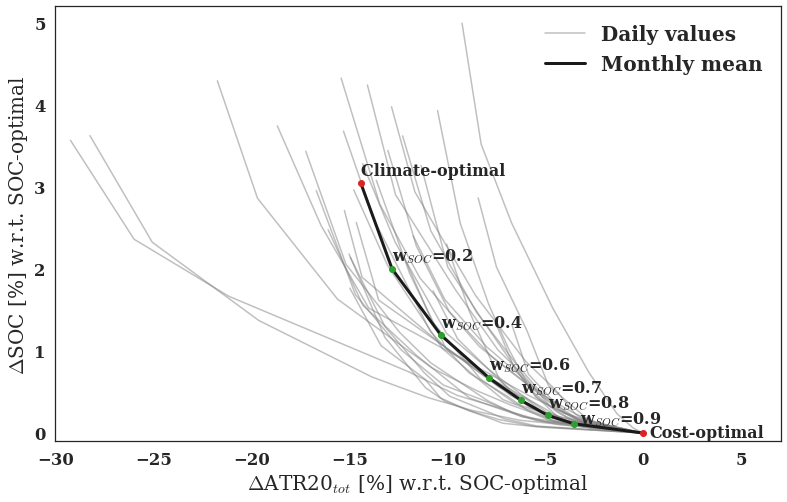

In [18]:
atr_list = [TOT_ATR20TOT_change_atr,
            TOT_ATR20TOT_change_V02,
            TOT_ATR20TOT_change_V04,
            TOT_ATR20TOT_change_V06,
            TOT_ATR20TOT_change_V07,
            TOT_ATR20TOT_change_V08,
            TOT_ATR20TOT_change_V09] 

ds_atr_list = xr.concat(atr_list, 'strategy')

soc_list = [TOT_SOC_change_atr,
            TOT_SOC_change_V02,
            TOT_SOC_change_V04,
            TOT_SOC_change_V06,
            TOT_SOC_change_V07,
            TOT_SOC_change_V08,
            TOT_SOC_change_V09] 

ds_soc_list = xr.concat(soc_list, 'strategy')
 

labels = ['atr','V02','V04','V06','V07','V08','V09', 'soc']

my_stat='percent'
palette = ['tab:red','tab:green','tab:green','tab:green','tab:green','tab:green','tab:green', 'tab:red']

fig, ax0 = plt.subplots(figsize=(13,8))

labels = ['Climate-optimal ',
          'w$_{SOC}$=0.2', 
          'w$_{SOC}$=0.4', 
          'w$_{SOC}$=0.6', 
          'w$_{SOC}$=0.7', 
          'w$_{SOC}$=0.8', 
          'w$_{SOC}$=0.9', 
          'Cost-optimal']
            
for day in range(len(ds_soc_list.time)):
    x = ds_atr_list.isel(time=day).values
    y = ds_soc_list.isel(time=day).values
    x = np.append(x, 0)
    y = np.append(y, 0)
    if day==0:
        plt.plot(x,y, 'gray', alpha=0.5, zorder=1, label='Daily values')
    else:
        plt.plot(x,y, 'gray', alpha=0.5, zorder=1)  
    

x = ds_atr_list.mean(dim='time').values
y = ds_soc_list.mean(dim='time').values
x = np.append(x, 0)
y = np.append(y, 0)
plt.plot(x,y, 'k', linewidth=3, zorder=2, label='Monthly mean')
for i, label in enumerate(labels):
    plt.scatter(x[i], y[i], color=palette[i], zorder=3)
    if i==6:
        plt.annotate(label, (x[i]+0.3, y[i]), fontsize=16)
    elif i==7:
        plt.annotate(label, (x[i]+0.3, y[i]-0.05), fontsize=16)
    else:
        plt.annotate(label, (x[i], y[i]+0.1), fontsize=16)

plt.xlim([-30, 7])
plt.ylim([-0.1, 5.2])
plt.xlabel(r'$\Delta$ATR20$_{tot}$ [%] w.r.t. SOC-optimal', fontsize=20)
plt.ylabel(r'$\Delta$SOC [%] w.r.t. SOC-optimal', fontsize=20)
plt.legend(prop={'size': 20}, ncol=1, frameon=False)
plt.show()

# Figure 7

In [19]:
speed_atr, dist_atr, fuel_atr, time_atr, SOC_atr = SOC_calculations(ds_airtraf_atr)
speed_soc, dist_soc, fuel_soc, time_soc, SOC_soc = SOC_calculations(ds_airtraf_soc)
speed_V02, dist_V02, fuel_V02, time_V02, SOC_V02 = SOC_calculations(ds_airtraf_V02)
speed_V04, dist_V04, fuel_V04, time_V04, SOC_V04 = SOC_calculations(ds_airtraf_V04)
speed_V06, dist_V06, fuel_V06, time_V06, SOC_V06 = SOC_calculations(ds_airtraf_V06)
speed_V07, dist_V07, fuel_V07, time_V07, SOC_V07 = SOC_calculations(ds_airtraf_V07)
speed_V08, dist_V08, fuel_V08, time_V08, SOC_V08 = SOC_calculations(ds_airtraf_V08)
speed_V09, dist_V09, fuel_V09, time_V09, SOC_V09 = SOC_calculations(ds_airtraf_V09)
speed_f05, dist_f05, fuel_f05, time_f05, SOC_f05 = SOC_calculations(ds_airtraf_f05)
speed_f10, dist_f10, fuel_f10, time_f10, SOC_f10 = SOC_calculations(ds_airtraf_f10)
speed_f20, dist_f20, fuel_f20, time_f20, SOC_f20 = SOC_calculations(ds_airtraf_f20)
speed_f30, dist_f30, fuel_f30, time_f30, SOC_f30 = SOC_calculations(ds_airtraf_f30)
speed_h71, dist_h71, fuel_h71, time_h71, SOC_h71 = SOC_calculations(ds_airtraf_h71)



In [20]:
ATR20TOT_traj_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
ATR20TOT_traj_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")


ATR20TOT_change_atr = 100*(ATR20TOT_traj_atr - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_V02 = 100*(ATR20TOT_traj_V02 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_V04 = 100*(ATR20TOT_traj_V04 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_V06 = 100*(ATR20TOT_traj_V06 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_V07 = 100*(ATR20TOT_traj_V07 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_V08 = 100*(ATR20TOT_traj_V08 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_V09 = 100*(ATR20TOT_traj_V09 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_f05 = 100*(ATR20TOT_traj_f05 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_f10 = 100*(ATR20TOT_traj_f10 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_f20 = 100*(ATR20TOT_traj_f20 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_f30 = 100*(ATR20TOT_traj_f30 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc
ATR20TOT_change_h71 = 100*(ATR20TOT_traj_h71 - ATR20TOT_traj_soc)/ATR20TOT_traj_soc

ATR20TOT_change_atr_data = np.reshape(ATR20TOT_change_atr.values, (np.size(ATR20TOT_change_atr)))
ATR20TOT_change_V02_data = np.reshape(ATR20TOT_change_V02.values, (np.size(ATR20TOT_change_V02)))
ATR20TOT_change_V04_data = np.reshape(ATR20TOT_change_V04.values, (np.size(ATR20TOT_change_V04)))
ATR20TOT_change_V06_data = np.reshape(ATR20TOT_change_V06.values, (np.size(ATR20TOT_change_V06)))
ATR20TOT_change_V07_data = np.reshape(ATR20TOT_change_V07.values, (np.size(ATR20TOT_change_V07)))
ATR20TOT_change_V08_data = np.reshape(ATR20TOT_change_V08.values, (np.size(ATR20TOT_change_V08)))
ATR20TOT_change_V09_data = np.reshape(ATR20TOT_change_V09.values, (np.size(ATR20TOT_change_V09)))
ATR20TOT_change_f05_data = np.reshape(ATR20TOT_change_f05.values, (np.size(ATR20TOT_change_f05)))
ATR20TOT_change_f10_data = np.reshape(ATR20TOT_change_f10.values, (np.size(ATR20TOT_change_f10)))
ATR20TOT_change_f20_data = np.reshape(ATR20TOT_change_f20.values, (np.size(ATR20TOT_change_f20)))
ATR20TOT_change_f30_data = np.reshape(ATR20TOT_change_f30.values, (np.size(ATR20TOT_change_f30)))
ATR20TOT_change_h71_data = np.reshape(ATR20TOT_change_h71.values, (np.size(ATR20TOT_change_h71)))

In [21]:
SOC_traj_atr = SOC_atr.sum(dim="AirTraf_waypoints_out")
SOC_traj_soc = SOC_soc.sum(dim="AirTraf_waypoints_out")
SOC_traj_V02 = SOC_V02.sum(dim="AirTraf_waypoints_out")
SOC_traj_V04 = SOC_V04.sum(dim="AirTraf_waypoints_out")
SOC_traj_V06 = SOC_V06.sum(dim="AirTraf_waypoints_out")
SOC_traj_V07 = SOC_V07.sum(dim="AirTraf_waypoints_out")
SOC_traj_V08 = SOC_V08.sum(dim="AirTraf_waypoints_out")
SOC_traj_V09 = SOC_V09.sum(dim="AirTraf_waypoints_out")
SOC_traj_f05 = SOC_f05.sum(dim="AirTraf_waypoints_out")
SOC_traj_f10 = SOC_f10.sum(dim="AirTraf_waypoints_out")
SOC_traj_f20 = SOC_f20.sum(dim="AirTraf_waypoints_out")
SOC_traj_f30 = SOC_f30.sum(dim="AirTraf_waypoints_out")
SOC_traj_h71 = SOC_h71.sum(dim="AirTraf_waypoints_out")


SOC_change_atr = 100*(SOC_traj_atr - SOC_traj_soc)/SOC_traj_soc
SOC_change_V02 = 100*(SOC_traj_V02 - SOC_traj_soc)/SOC_traj_soc
SOC_change_V04 = 100*(SOC_traj_V04 - SOC_traj_soc)/SOC_traj_soc
SOC_change_V06 = 100*(SOC_traj_V06 - SOC_traj_soc)/SOC_traj_soc
SOC_change_V07 = 100*(SOC_traj_V07 - SOC_traj_soc)/SOC_traj_soc
SOC_change_V08 = 100*(SOC_traj_V08 - SOC_traj_soc)/SOC_traj_soc
SOC_change_V09 = 100*(SOC_traj_V09 - SOC_traj_soc)/SOC_traj_soc
SOC_change_f05 = 100*(SOC_traj_f05 - SOC_traj_soc)/SOC_traj_soc
SOC_change_f10 = 100*(SOC_traj_f10 - SOC_traj_soc)/SOC_traj_soc
SOC_change_f20 = 100*(SOC_traj_f20 - SOC_traj_soc)/SOC_traj_soc
SOC_change_f30 = 100*(SOC_traj_f30 - SOC_traj_soc)/SOC_traj_soc
SOC_change_h71 = 100*(SOC_traj_h71 - SOC_traj_soc)/SOC_traj_soc

SOC_change_atr_data = np.reshape(SOC_change_atr.values, (np.size(SOC_change_atr)))
SOC_change_V02_data = np.reshape(SOC_change_V02.values, (np.size(SOC_change_V02)))
SOC_change_V04_data = np.reshape(SOC_change_V04.values, (np.size(SOC_change_V04)))
SOC_change_V06_data = np.reshape(SOC_change_V06.values, (np.size(SOC_change_V06)))
SOC_change_V07_data = np.reshape(SOC_change_V07.values, (np.size(SOC_change_V07)))
SOC_change_V08_data = np.reshape(SOC_change_V08.values, (np.size(SOC_change_V08)))
SOC_change_V09_data = np.reshape(SOC_change_V09.values, (np.size(SOC_change_V09)))
SOC_change_f05_data = np.reshape(SOC_change_f05.values, (np.size(SOC_change_f05)))
SOC_change_f10_data = np.reshape(SOC_change_f10.values, (np.size(SOC_change_f10)))
SOC_change_f20_data = np.reshape(SOC_change_f20.values, (np.size(SOC_change_f20)))
SOC_change_f30_data = np.reshape(SOC_change_f30.values, (np.size(SOC_change_f30)))
SOC_change_h71_data = np.reshape(SOC_change_h71.values, (np.size(SOC_change_h71)))

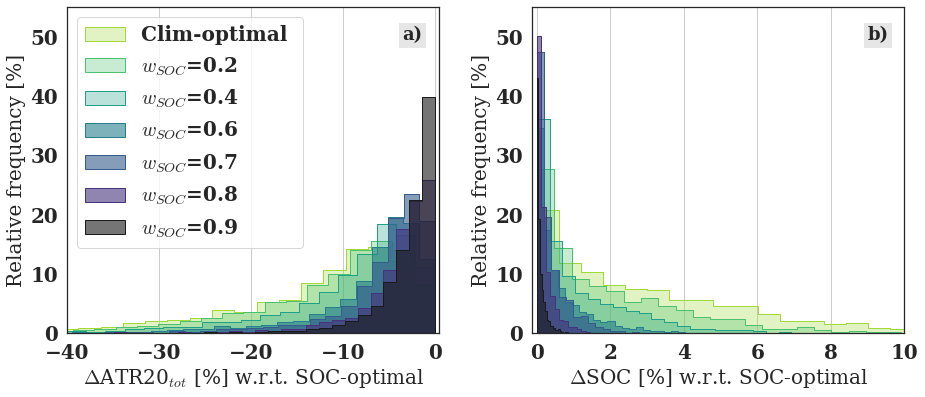

In [22]:
my_stat='percent'
num_bins=30
palette = sns.color_palette("viridis_r")

fig, axs = plt.subplots(figsize=(15,6), ncols=2)

line01 = sns.histplot(ATR20TOT_change_atr_data, element="step", bins=num_bins, ax=axs[0], color=palette[0], alpha=0.3, stat=my_stat, label='Clim-optimal ')
line02 = sns.histplot(ATR20TOT_change_V02_data, element="step", bins=num_bins, ax=axs[0], color=palette[1], alpha=0.3, stat=my_stat, label='$w_{SOC}$=0.2')
line03 = sns.histplot(ATR20TOT_change_V04_data, element="step", bins=num_bins, ax=axs[0], color=palette[2], alpha=0.3, stat=my_stat, label='$w_{SOC}$=0.4')
line04 = sns.histplot(ATR20TOT_change_V06_data, element="step", bins=num_bins, ax=axs[0], color=palette[3], alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.6')
line05 = sns.histplot(ATR20TOT_change_V07_data, element="step", bins=num_bins, ax=axs[0], color=palette[4], alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.7')
line06 = sns.histplot(ATR20TOT_change_V08_data, element="step", bins=num_bins, ax=axs[0], color=palette[5], alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.8')
line07 = sns.histplot(ATR20TOT_change_V09_data, element="step", bins=num_bins, ax=axs[0], color= 'k', alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.9')

line11 = sns.histplot(SOC_change_atr_data, element="step", bins=num_bins, ax=axs[1], color=palette[0], alpha=0.3, stat=my_stat, label='Clim-optimal ')
line12 = sns.histplot(SOC_change_V02_data, element="step", bins=num_bins, ax=axs[1], color=palette[1], alpha=0.3, stat=my_stat, label='$w_{SOC}$=0.2')
line13 = sns.histplot(SOC_change_V04_data, element="step", bins=num_bins, ax=axs[1], color=palette[2], alpha=0.3, stat=my_stat, label='$w_{SOC}$=0.4')
line14 = sns.histplot(SOC_change_V06_data, element="step", bins=num_bins, ax=axs[1], color=palette[3], alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.6')
line15 = sns.histplot(SOC_change_V07_data, element="step", bins=num_bins, ax=axs[1], color=palette[4], alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.7')
line16 = sns.histplot(SOC_change_V08_data, element="step", bins=num_bins, ax=axs[1], color=palette[5], alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.8')
line17 = sns.histplot(SOC_change_V09_data, element="step", bins=num_bins, ax=axs[1], color= 'k', alpha=0.6, stat=my_stat, label='$w_{SOC}$=0.9')

axs[0].set_xlim([-40,0.5])
axs[0].set_ylim([0,55])
axs[0].set_xlabel(r'$\Delta$ATR20$_{tot}$ [%] w.r.t. SOC-optimal', fontsize=20)
axs[0].set_ylabel('Relative frequency [%]', fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=20)
axs[0].yaxis.set_tick_params(labelsize=20)
axs[0].grid(axis="x")
axs[0].annotate('a)',xy=(0.9, 0.9), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))

axs[1].set_xlim([-0.12,10])
axs[1].set_ylim([0,55])
axs[1].set_xlabel(r'$\Delta$SOC [%] w.r.t. SOC-optimal', fontsize=20)
axs[1].set_ylabel('Relative frequency [%]', fontsize=20)
axs[1].xaxis.set_tick_params(labelsize=20)
axs[1].yaxis.set_tick_params(labelsize=20)
axs[1].grid(axis="x")
axs[1].annotate('b)',xy=(0.9, 0.9), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))

plt.subplots_adjust(wspace=0.25)
axs[0].legend(fontsize=20, loc='upper left')

# Figure 8

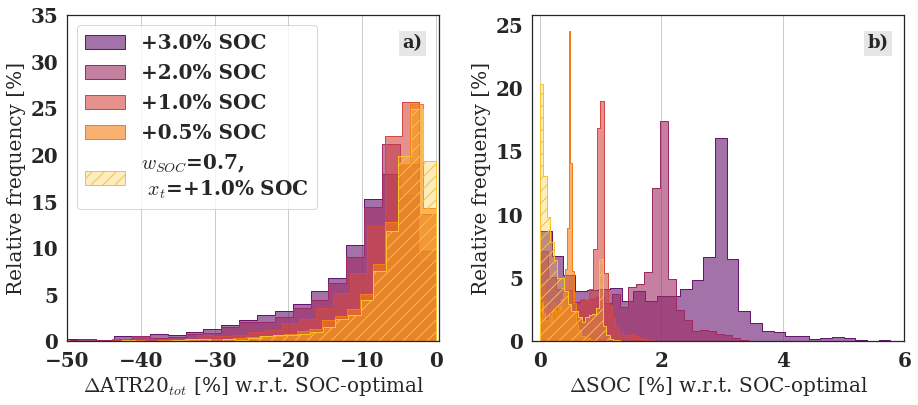

In [23]:
my_stat='percent'
num_bins=30
palette = sns.color_palette("inferno")

fig, axs = plt.subplots(figsize=(15,6), ncols=2)

line01 = sns.histplot(ATR20TOT_change_f30_data, element="step", bins=num_bins, ax=axs[0], color=palette[1], alpha=0.6, stat=my_stat, label='+3.0% SOC')
line02 = sns.histplot(ATR20TOT_change_f20_data, element="step", bins=num_bins, ax=axs[0], color=palette[2], alpha=0.6, stat=my_stat, label='+2.0% SOC')
line03 = sns.histplot(ATR20TOT_change_f10_data, element="step", bins=num_bins, ax=axs[0], color=palette[3], alpha=0.6, stat=my_stat, label='+1.0% SOC')
line04 = sns.histplot(ATR20TOT_change_f05_data, element="step", bins=num_bins, ax=axs[0], color=palette[4], alpha=0.6, stat=my_stat, label='+0.5% SOC')
line05 = sns.histplot(ATR20TOT_change_h71_data, element="step", bins=num_bins, ax=axs[0], color=palette[5], alpha=0.3, stat=my_stat, label='$w_{SOC}$=0.7, \n $x_{t}$=+1.0% SOC', hatch='//')   

line11 = sns.histplot(SOC_change_f30_data, element="step", bins=num_bins, ax=axs[1], color=palette[1], alpha=0.6, stat=my_stat, label='+3.0% SOC')
line12 = sns.histplot(SOC_change_f20_data, element="step", bins=num_bins, ax=axs[1], color=palette[2], alpha=0.6, stat=my_stat, label='+2.0% SOC')
line13 = sns.histplot(SOC_change_f10_data, element="step", bins=num_bins, ax=axs[1], color=palette[3], alpha=0.6, stat=my_stat, label='+1.0% SOC')
line14 = sns.histplot(SOC_change_f05_data, element="step", bins=num_bins, ax=axs[1], color=palette[4], alpha=0.6, stat=my_stat, label='+0.5% SOC')
line15 = sns.histplot(SOC_change_h71_data, element="step", bins=num_bins, ax=axs[1], color=palette[5], alpha=0.3, stat=my_stat, label='$w_{SOC}$=0.7, \n $x_{t}$=+1.0% SOC', hatch='//')   

axs[0].set_xlim([-50,0.5])
axs[0].set_ylim([0,35])
axs[0].set_xlabel(r'$\Delta$ATR20$_{tot}$ [%] w.r.t. SOC-optimal', fontsize=20)
axs[0].set_ylabel('Relative frequency [%]', fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=20)
axs[0].yaxis.set_tick_params(labelsize=20)
axs[0].grid(axis="x")
axs[0].annotate('a)',xy=(0.9, 0.9), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))

axs[1].set_xlim([-0.12,6])
axs[1].set_xlabel(r'$\Delta$SOC [%] w.r.t. SOC-optimal', fontsize=20)
axs[1].set_ylabel('Relative frequency [%]', fontsize=20)
axs[1].xaxis.set_tick_params(labelsize=20)
axs[1].yaxis.set_tick_params(labelsize=20)
axs[1].grid(axis="x")
axs[1].annotate('b)',xy=(0.9, 0.9), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))

plt.subplots_adjust(wspace=0.25)
axs[0].legend(fontsize=20, loc='upper left')

# Figure 9

In [24]:
def get_percentages_soc_atr20(tot_ATR20TOT, tot_SOC, tot_ATR20TOT_soc, tot_SOC_soc):
        
    ATR20_reduction = tot_ATR20TOT- tot_ATR20TOT_soc
    SOC_reduction = tot_SOC - tot_SOC_soc
    
    ATR20_reduction = ATR20_reduction.where(ATR20_reduction!=0)
    SOC_reduction = SOC_reduction.where(SOC_reduction!=0)
    coeff_k = -SOC_reduction/ATR20_reduction

    total_ATR20_reduction = ATR20_reduction.sum(dim={'time','AirTraf_routes_out'})
    total_SOC_reduction = SOC_reduction.sum(dim={'time','AirTraf_routes_out'})
    
    ATR20_stacked = ATR20_reduction.stack(z=("time", "AirTraf_routes_out"))
    SOC_stacked = SOC_reduction.stack(z=("time", "AirTraf_routes_out"))
    coeff_k_stacked = coeff_k.stack(z=("time", "AirTraf_routes_out"))
    
    sorted_ATR20_reduction = ATR20_stacked.sortby(coeff_k_stacked, ascending=True)
    sorted_SOC_reduction = SOC_stacked.sortby(coeff_k_stacked, ascending=True)
    sorted_coeff_k = coeff_k_stacked.sortby(coeff_k_stacked, ascending=True)

    cumulative_ATR20_reduction = np.cumsum(sorted_ATR20_reduction)
    cumulative_SOC_reduction = np.cumsum(sorted_SOC_reduction)
    
    perc_cum_ATR20_reduction = 100*cumulative_ATR20_reduction/tot_ATR20TOT_soc.sum()
    perc_cum_SOC_reduction = 100*cumulative_SOC_reduction/tot_SOC_soc.sum()
    
    return sorted_coeff_k, perc_cum_ATR20_reduction, perc_cum_SOC_reduction, sorted_ATR20_reduction, sorted_SOC_reduction


In [25]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

n_days = 31
n_flights = 100*n_days
perc_flights = np.flip(100*(n_flights-np.arange(n_flights))/n_flights)

speed_atr, dist_atr, fuel_atr, time_atr, SOC_atr = SOC_calculations(ds_airtraf_atr)
speed_soc, dist_soc, fuel_soc, time_soc, SOC_soc = SOC_calculations(ds_airtraf_soc)
speed_V02, dist_V02, fuel_V02, time_V02, SOC_V02 = SOC_calculations(ds_airtraf_V02)
speed_V04, dist_V04, fuel_V04, time_V04, SOC_V04 = SOC_calculations(ds_airtraf_V04)
speed_V06, dist_V06, fuel_V06, time_V06, SOC_V06 = SOC_calculations(ds_airtraf_V06)
speed_V07, dist_V07, fuel_V07, time_V07, SOC_V07 = SOC_calculations(ds_airtraf_V07)
speed_V08, dist_V08, fuel_V08, time_V08, SOC_V08 = SOC_calculations(ds_airtraf_V08)
speed_V09, dist_V09, fuel_V09, time_V09, SOC_V09 = SOC_calculations(ds_airtraf_V09)
speed_f10, dist_f10, fuel_f10, time_f10, SOC_f10 = SOC_calculations(ds_airtraf_f10)
speed_f05, dist_f05, fuel_f05, time_f05, SOC_f05 = SOC_calculations(ds_airtraf_f05)
speed_f20, dist_f20, fuel_f20, time_f20, SOC_f20 = SOC_calculations(ds_airtraf_f20)
speed_f30, dist_f30, fuel_f30, time_f30, SOC_f30 = SOC_calculations(ds_airtraf_f30)

tot_SOC_atr = SOC_atr.sum(dim="AirTraf_waypoints_out")
tot_SOC_soc = SOC_soc.sum(dim="AirTraf_waypoints_out")
tot_SOC_V02 = SOC_V02.sum(dim="AirTraf_waypoints_out")
tot_SOC_V04 = SOC_V04.sum(dim="AirTraf_waypoints_out")
tot_SOC_V06 = SOC_V06.sum(dim="AirTraf_waypoints_out")
tot_SOC_V07 = SOC_V07.sum(dim="AirTraf_waypoints_out")
tot_SOC_V08 = SOC_V08.sum(dim="AirTraf_waypoints_out")
tot_SOC_V09 = SOC_V09.sum(dim="AirTraf_waypoints_out")
tot_SOC_f10 = SOC_f10.sum(dim="AirTraf_waypoints_out")
tot_SOC_f05 = SOC_f05.sum(dim="AirTraf_waypoints_out")
tot_SOC_f20 = SOC_f20.sum(dim="AirTraf_waypoints_out")
tot_SOC_f30 = SOC_f30.sum(dim="AirTraf_waypoints_out")

tot_ATR20TOT_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")    
tot_ATR20TOT_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")    
tot_ATR20TOT_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")
tot_ATR20TOT_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out")

sorted_coeff_k_atr, perc_cum_ATR20_reduction_atr, perc_cum_SOC_reduction_atr, sorted_ATR20_reduction_atr, sorted_SOC_reduction_atr = get_percentages_soc_atr20(tot_ATR20TOT_atr, tot_SOC_atr, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_V02, perc_cum_ATR20_reduction_V02, perc_cum_SOC_reduction_V02, sorted_ATR20_reduction_V02, sorted_SOC_reduction_V02 = get_percentages_soc_atr20(tot_ATR20TOT_V02, tot_SOC_V02, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_V04, perc_cum_ATR20_reduction_V04, perc_cum_SOC_reduction_V04, sorted_ATR20_reduction_V04, sorted_SOC_reduction_V04 = get_percentages_soc_atr20(tot_ATR20TOT_V04, tot_SOC_V04, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_V06, perc_cum_ATR20_reduction_V06, perc_cum_SOC_reduction_V06, sorted_ATR20_reduction_V06, sorted_SOC_reduction_V06 = get_percentages_soc_atr20(tot_ATR20TOT_V06, tot_SOC_V06, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_V07, perc_cum_ATR20_reduction_V07, perc_cum_SOC_reduction_V07, sorted_ATR20_reduction_V07, sorted_SOC_reduction_V07 = get_percentages_soc_atr20(tot_ATR20TOT_V07, tot_SOC_V07, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_V08, perc_cum_ATR20_reduction_V08, perc_cum_SOC_reduction_V08, sorted_ATR20_reduction_V08, sorted_SOC_reduction_V08 = get_percentages_soc_atr20(tot_ATR20TOT_V08, tot_SOC_V08, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_V09, perc_cum_ATR20_reduction_V09, perc_cum_SOC_reduction_V09, sorted_ATR20_reduction_V09, sorted_SOC_reduction_V09 = get_percentages_soc_atr20(tot_ATR20TOT_V09, tot_SOC_V09, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_f10, perc_cum_ATR20_reduction_f10, perc_cum_SOC_reduction_f10, sorted_ATR20_reduction_f10, sorted_SOC_reduction_f10 = get_percentages_soc_atr20(tot_ATR20TOT_f10, tot_SOC_f10, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_f05, perc_cum_ATR20_reduction_f05, perc_cum_SOC_reduction_f05, sorted_ATR20_reduction_f05, sorted_SOC_reduction_f05 = get_percentages_soc_atr20(tot_ATR20TOT_f05, tot_SOC_f05, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_f20, perc_cum_ATR20_reduction_f20, perc_cum_SOC_reduction_f20, sorted_ATR20_reduction_f20, sorted_SOC_reduction_f20 = get_percentages_soc_atr20(tot_ATR20TOT_f20, tot_SOC_f20, tot_ATR20TOT_soc, tot_SOC_soc)
sorted_coeff_k_f30, perc_cum_ATR20_reduction_f30, perc_cum_SOC_reduction_f30, sorted_ATR20_reduction_f30, sorted_SOC_reduction_f30 = get_percentages_soc_atr20(tot_ATR20TOT_f30, tot_SOC_f30, tot_ATR20TOT_soc, tot_SOC_soc)


In [26]:
vikors = [0.2,0.4,0.6,0.7,0.8,0.9]
targets = [0.5,1.0,2.0,3.0]

cmap_vikors = mpl.cm.Blues
norm_vikors = mpl.colors.Normalize(vmin=-1, vmax=float(len(vikors))+1)
col_vikors = []
for i in range (1, len(vikors)+1):
    col_vikors.append(cmap_vikors(norm_vikors(float(i))))

cmap_targets = mpl.cm.Reds
norm_targets = mpl.colors.Normalize(vmin=-1, vmax=float(len(targets))+1)
col_targets = []
for i in range (1, len(targets)+1):
    col_targets.append(cmap_targets(norm_targets(float(i))))

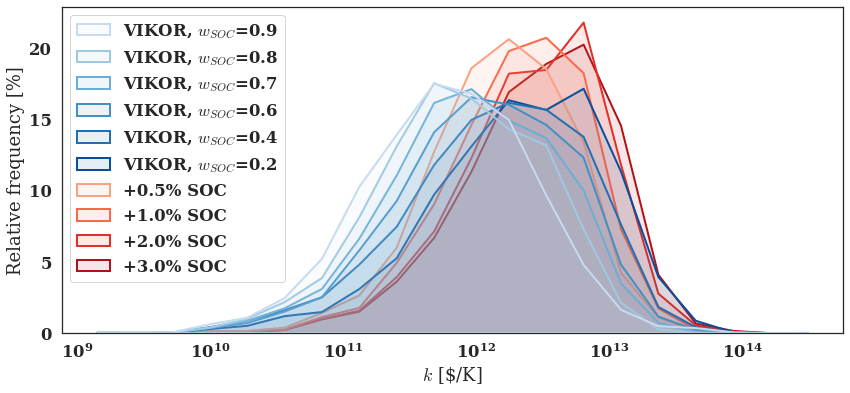

In [27]:
d = {r'VIKOR, $w_{SOC}$=0.9': sorted_coeff_k_V09,
     r'VIKOR, $w_{SOC}$=0.8': sorted_coeff_k_V08,
     r'VIKOR, $w_{SOC}$=0.7': sorted_coeff_k_V07,
     r'VIKOR, $w_{SOC}$=0.6': sorted_coeff_k_V06, 
     r'VIKOR, $w_{SOC}$=0.4': sorted_coeff_k_V04, 
     r'VIKOR, $w_{SOC}$=0.2': sorted_coeff_k_V02, 
     '+0.5% SOC': sorted_coeff_k_f05, 
     '+1.0% SOC': sorted_coeff_k_f10, 
     '+2.0% SOC': sorted_coeff_k_f20, 
     '+3.0% SOC': sorted_coeff_k_f30}
df = pd.DataFrame(data=d)
#colors = ['lightblue', 'lightsteelblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'darkblue', 'lightcoral', 'indianred', 'firebrick', 'darkred']
colors = col_vikors+col_targets

fig, ax0 = plt.subplots(figsize=(14,6))

g = sns.histplot(df, log_scale=True, stat="percent", element="poly", alpha=0.1, palette=colors, linewidth=2, bins=20, common_norm=False)

sns.move_legend(g, "upper left")
plt.xlabel('$\it{k}$ [\$/K]', fontsize=18)
plt.ylabel('Relative frequency [%]', fontsize=18)
plt.show()

# Figure 10

In [28]:
##################################################################
#                       Altitudes                                #
##################################################################

ALT_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=2)
ALT_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=2)    
ALT_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=2)
ALT_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=2)
ALT_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=2)
ALT_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=2)    
ALT_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=2)
ALT_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=2)
ALT_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=2)    
ALT_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=2)
ALT_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=2)
ALT_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=2)
ALT_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=2)


##################################################################
#                        Distances                               #
##################################################################

DIST_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=5)
DIST_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=5)    
DIST_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=5)
DIST_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=5)
DIST_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=5)
DIST_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=5)    
DIST_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=5)
DIST_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=5)
DIST_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=5)    
DIST_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=5)
DIST_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=5)
DIST_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=5)
DIST_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=5)


In [29]:
plot_atr_alt = 1e-3*(ALT_atr.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_soc_alt = 1e-3*(ALT_soc.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_V02_alt = 1e-3*(ALT_V02.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_V04_alt = 1e-3*(ALT_V04.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_V06_alt = 1e-3*(ALT_V06.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_V07_alt = 1e-3*(ALT_V07.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_V08_alt = 1e-3*(ALT_V08.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_V09_alt = 1e-3*(ALT_V09.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_f05_alt = 1e-3*(ALT_f05.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_f10_alt = 1e-3*(ALT_f10.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_f20_alt = 1e-3*(ALT_f20.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_f30_alt = 1e-3*(ALT_f30.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))
plot_h71_alt = 1e-3*(ALT_h71.mean(dim={'AirTraf_routes_out', 'AirTraf_waypoints_out'}))

plot_atr_dist = (DIST_atr.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_soc_dist = (DIST_soc.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_V02_dist = (DIST_V02.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_V04_dist = (DIST_V04.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_V06_dist = (DIST_V06.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_V07_dist = (DIST_V07.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_V08_dist = (DIST_V08.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_V09_dist = (DIST_V09.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_f05_dist = (DIST_f05.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_f10_dist = (DIST_f10.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_f20_dist = (DIST_f20.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_f30_dist = (DIST_f30.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))
plot_h71_dist = (DIST_h71.sum(dim='AirTraf_waypoints_out').mean(dim='AirTraf_routes_out'))

plot_alt = [plot_atr_alt.values,  
            plot_V02_alt.values, 
            plot_V04_alt.values,        
            plot_V06_alt.values,
            plot_V07_alt.values,
            plot_V08_alt.values,
            plot_V09_alt.values,
            plot_soc_alt.values,
            plot_f30_alt.values, 
            plot_f20_alt.values, 
            plot_f10_alt.values, 
            plot_f05_alt.values,             
            plot_h71_alt.values]

plot_dist =[plot_atr_dist.values,  
            plot_V02_dist.values, 
            plot_V04_dist.values,        
            plot_V06_dist.values,
            plot_V07_dist.values,
            plot_V08_dist.values,
            plot_V09_dist.values,
            plot_soc_dist.values,
            plot_f30_dist.values, 
            plot_f20_dist.values, 
            plot_f10_dist.values, 
            plot_f05_dist.values,             
            plot_h71_dist.values]

labels = ['Clim.-opt. ',
          '$w_{SOC}$=0.2', 
          '$w_{SOC}$=0.4', 
          '$w_{SOC}$=0.6', 
          '$w_{SOC}$=0.7',     
          '$w_{SOC}$=0.8', 
          '$w_{SOC}$=0.9', 
          'Cost-opt.',
          '+3% SOC',
          '+2% SOC',
          '+1% SOC',
          '+0.5% SOC',
          '$w_{SOC}$=0.7,\n+1.0% SOC']

df_alt = pd.DataFrame(data = pd.DataFrame(plot_alt).T.values.tolist(), columns = labels, index = [str(i) for i in range(31)])
df_dist = pd.DataFrame(data = pd.DataFrame(plot_dist).T.values.tolist(), columns = labels, index = [str(i) for i in range(31)])

cdf_alt = pd.concat([df_alt])                                
mdf_alt = pd.melt(cdf_alt) 

cdf_dist = pd.concat([df_dist])                                
mdf_dist = pd.melt(cdf_dist) 

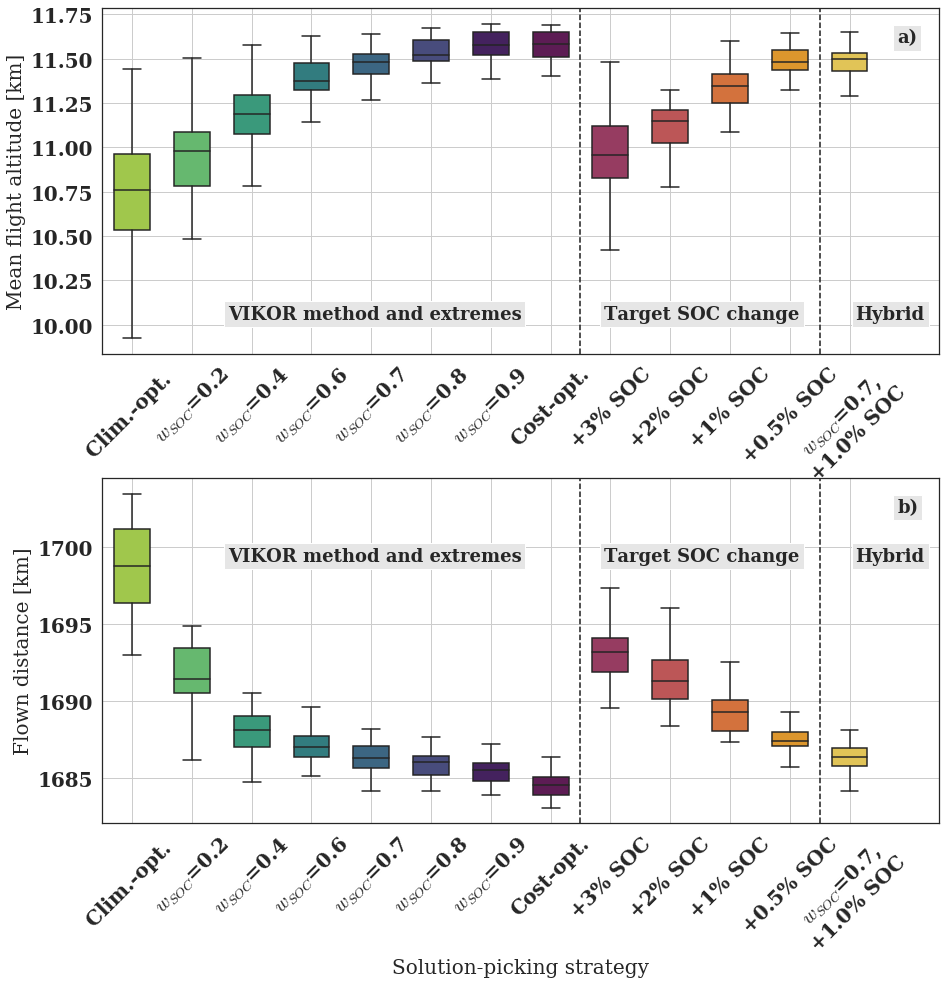

In [30]:
my_stat='percent'
num_bins=30
palette_vikor = plt.cm.viridis_r(np.linspace(0., 1, 8))
palette_fixed = plt.cm.inferno(np.linspace(0.4, 1, 6))
palette_stack = np.vstack((palette_vikor, palette_fixed))
my_cmap = mcolors.LinearSegmentedColormap.from_list('', palette_stack)
mpl.cm.register_cmap("mycolormap", my_cmap)
my_palette = sns.color_palette("mycolormap", n_colors=13)

fig, axs = plt.subplots(figsize=(15, 15), nrows=2)

line01 = sns.boxplot(x='variable', y='value', orient="v", data=mdf_alt,  dodge=True, width=0.6, palette=my_palette, showfliers = False, ax=axs[0])
line11 = sns.boxplot(x='variable', y='value', orient="v", data=mdf_dist, dodge=True, width=0.6, palette=my_palette, showfliers = False, ax=axs[1])

#plt.axvline(x = 7.5, color='k', linestyle='dashed', ax=axs[0])
#plt.axvline(x = 7.5, color='k', linestyle='dashed', ax=axs[1])

axs[0].axvline(x = 7.5, color='k', linestyle='dashed')
axs[0].axvline(x = 11.5, color='k', linestyle='dashed')
axs[0].set_xlim([-0.5,13.5])
axs[0].set_xlabel('Solution-picking strategy', fontsize=20)
axs[0].set_ylabel('Mean flight altitude [km]', fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=20, rotation=45)
axs[0].yaxis.set_tick_params(labelsize=20)
axs[0].grid(axis="both")
axs[0].annotate('a)',xy=(0.95, 0.9), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))
axs[0].annotate('VIKOR method and extremes',xy=(0.15, 0.1), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))
axs[0].annotate('Target SOC change',xy=(0.6, 0.1), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))
axs[0].annotate('Hybrid',xy=(0.9, 0.1), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))

axs[1].axvline(x = 7.5, color='k', linestyle='dashed')
axs[1].axvline(x = 11.5, color='k', linestyle='dashed')
axs[1].set_xlim([-0.5,13.5])
axs[1].set_xlabel('Solution-picking strategy', fontsize=20)
axs[1].set_ylabel('Flown distance [km]', fontsize=20)
axs[1].xaxis.set_tick_params(labelsize=20, rotation=45)
axs[1].yaxis.set_tick_params(labelsize=20)
axs[1].grid(axis="both")
axs[1].annotate('b)',xy=(0.95, 0.9), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))
axs[1].annotate('VIKOR method and extremes',xy=(0.15, 0.76), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))
axs[1].annotate('Target SOC change',xy=(0.6, 0.76), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))
axs[1].annotate('Hybrid',xy=(0.9, 0.76), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"))

plt.subplots_adjust(hspace=0.36)


# Figure 11

In [31]:
##################################################################
#   Average Temperature Response in a time horizon of 20 years   #
##################################################################

def calc_ATR20s(ds_airtraf_ac):
    
    # Get data
    
    ATR20o3 = ds_airtraf_ac.routes_out.isel(AirTraf_properties=10)  # ATR20 from ozone [K]
    
    ATR20ch4 = ds_airtraf_ac.routes_out.isel(AirTraf_properties=11) # ATR20 from methane [K]
    
    ATR20h20 = ds_airtraf_ac.routes_out.isel(AirTraf_properties=12) # ATR20 from H2O [K]
    
    ATR20cpc = ds_airtraf_ac.routes_out.isel(AirTraf_properties=13) # ATR20 from contrails [K]
    
    ATR20co2 = ds_airtraf_ac.routes_out.isel(AirTraf_properties=14) # ATR20 from CO2 [K]
    
    ATR20TOT = ds_airtraf_ac.routes_out.isel(AirTraf_properties=-1) # Total ATR20 [K]
    
    # Calculate ATR20nox values
    
    ATR20nox = ATR20o3 + ATR20ch4 # ATR20 from NOx emissions [K]
    
    return ATR20o3, ATR20ch4, ATR20h20, ATR20cpc, ATR20co2, ATR20TOT, ATR20nox

In [32]:
def make_list_ATR20_components(ds_airtraf, ds_airtraf_soc):
    
    ATR20o3, ATR20ch4, ATR20h20, ATR20cpc, ATR20co2, ATR20TOT, ATR20nox = calc_ATR20s(ds_airtraf)
    ATR20o3_soc, ATR20ch4_soc, ATR20h20_soc, ATR20cpc_soc, ATR20co2_soc, ATR20TOT_soc, ATR20nox_soc = calc_ATR20s(ds_airtraf_soc)

    diff_TOT_ATR20o3  = ATR20o3.sum() - ATR20o3_soc.sum()
    diff_TOT_ATR20ch4 = ATR20ch4.sum() - ATR20ch4_soc.sum()
    diff_TOT_ATR20h20 = ATR20h20.sum() - ATR20h20_soc.sum()
    diff_TOT_ATR20cpc = ATR20cpc.sum() - ATR20cpc_soc.sum()
    diff_TOT_ATR20co2 = ATR20co2.sum() - ATR20co2_soc.sum()
    diff_TOT_ATR20TOT = ATR20TOT.sum() - ATR20TOT_soc.sum()

    TOT_diff_TOT_ATR20TOT = diff_TOT_ATR20o3 + diff_TOT_ATR20ch4 + diff_TOT_ATR20h20 + diff_TOT_ATR20cpc + diff_TOT_ATR20co2
    print(TOT_diff_TOT_ATR20TOT.values, diff_TOT_ATR20TOT.values)

    list_ATR20s = [diff_TOT_ATR20cpc.values, diff_TOT_ATR20o3.values, diff_TOT_ATR20ch4.values, diff_TOT_ATR20h20.values, diff_TOT_ATR20co2.values]

    return list_ATR20s

list_ATR20s_atr = make_list_ATR20_components(ds_airtraf_atr, ds_airtraf_soc)
list_ATR20s_V02 = make_list_ATR20_components(ds_airtraf_V02, ds_airtraf_soc)
list_ATR20s_V04 = make_list_ATR20_components(ds_airtraf_V04, ds_airtraf_soc)
list_ATR20s_V06 = make_list_ATR20_components(ds_airtraf_V06, ds_airtraf_soc)
list_ATR20s_V07 = make_list_ATR20_components(ds_airtraf_V07, ds_airtraf_soc)
list_ATR20s_V08 = make_list_ATR20_components(ds_airtraf_V08, ds_airtraf_soc)
list_ATR20s_V09 = make_list_ATR20_components(ds_airtraf_V09, ds_airtraf_soc)
list_ATR20s_f05 = make_list_ATR20_components(ds_airtraf_f05, ds_airtraf_soc)
list_ATR20s_f10 = make_list_ATR20_components(ds_airtraf_f10, ds_airtraf_soc)
list_ATR20s_f20 = make_list_ATR20_components(ds_airtraf_f20, ds_airtraf_soc)
list_ATR20s_f30 = make_list_ATR20_components(ds_airtraf_f30, ds_airtraf_soc)
list_ATR20s_h71 = make_list_ATR20_components(ds_airtraf_h71, ds_airtraf_soc)


-2.0866432e-07 -2.0866435e-07
-1.853821e-07 -1.8538208e-07
-1.4943946e-07 -1.4943942e-07
-1.1386577e-07 -1.1386567e-07
-9.071927e-08 -9.0719254e-08
-7.1282706e-08 -7.1282784e-08
-5.2175963e-08 -5.2176006e-08
-1.0115852e-07 -1.0115855e-07
-1.2808627e-07 -1.280863e-07
-1.615536e-07 -1.6155366e-07
-1.8160237e-07 -1.8160233e-07
-8.6889514e-08 -8.68896e-08


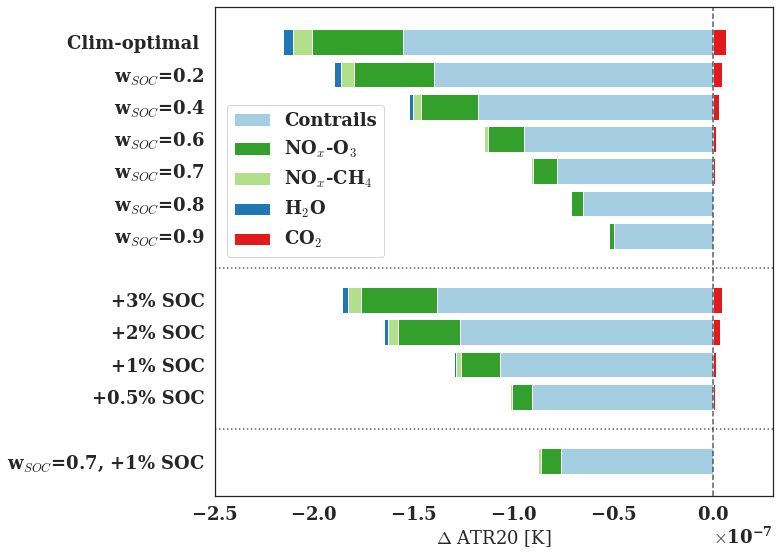

In [33]:
list_ATR20s_lab = ['Contrails', 'NO$_x$-O$_3$', 'NO$_x$-CH$_4$', 'H$_2$O', 'CO$_2$']

palette = sns.color_palette("Paired")

fig, ax0 = plt.subplots(figsize=(10,9))
 
plt.barh(np.linspace(1, 14, 14), [list_ATR20s_atr[0], 
                 list_ATR20s_V02[0],
                 list_ATR20s_V04[0],
                 list_ATR20s_V06[0],
                 list_ATR20s_V07[0],
                 list_ATR20s_V08[0],
                 list_ATR20s_V09[0],
                 np.array(0, dtype='float32'),
                 list_ATR20s_f30[0],
                 list_ATR20s_f20[0],
                 list_ATR20s_f10[0],
                 list_ATR20s_f05[0],
                 np.array(0, dtype='float32'),
                 list_ATR20s_h71[0]], 
        left=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], color=palette[0], label=list_ATR20s_lab[0])   

plt.barh(np.linspace(1, 14, 14), [list_ATR20s_atr[1],
                 list_ATR20s_V02[1],
                 list_ATR20s_V04[1],
                 list_ATR20s_V06[1],
                 list_ATR20s_V07[1],
                 list_ATR20s_V08[1],
                 list_ATR20s_V09[1],
                                  0,
                 list_ATR20s_f30[1],                 
                 list_ATR20s_f20[1],
                 list_ATR20s_f10[1],
                 list_ATR20s_f05[1],
                                  0,
                 list_ATR20s_h71[1]], 
        left=[list_ATR20s_atr[0],
                list_ATR20s_V02[0],
                list_ATR20s_V04[0],
                list_ATR20s_V06[0],
                list_ATR20s_V07[0],
                list_ATR20s_V08[0],
                list_ATR20s_V09[0],
                                 0,
                list_ATR20s_f30[0],
                list_ATR20s_f20[0],
                list_ATR20s_f10[0],
                list_ATR20s_f05[0],
                                 0,
                list_ATR20s_h71[0]], color=palette[3], label=list_ATR20s_lab[1])

plt.barh(np.linspace(1, 14, 14), [list_ATR20s_atr[2],
                 list_ATR20s_V02[2],
                 list_ATR20s_V04[2],
                 list_ATR20s_V06[2],
                 list_ATR20s_V07[2],
                 list_ATR20s_V08[2],
                 list_ATR20s_V09[2],
                                  0,
                 list_ATR20s_f30[2],
                 list_ATR20s_f20[2],
                 list_ATR20s_f10[2],
                 list_ATR20s_f05[2],
                                  0,
                 list_ATR20s_h71[2]], 
        left=[sum(list_ATR20s_atr[:2]),
                sum(list_ATR20s_V02[:2]),
                sum(list_ATR20s_V04[:2]),
                sum(list_ATR20s_V06[:2]),
                sum(list_ATR20s_V07[:2]),
                sum(list_ATR20s_V08[:2]),
                sum(list_ATR20s_V09[:2]),
                                       0,
                sum(list_ATR20s_f30[:2]),
                sum(list_ATR20s_f20[:2]),
                sum(list_ATR20s_f10[:2]),
                sum(list_ATR20s_f05[:2]),
                                       0,
                sum(list_ATR20s_h71[:2])], color=palette[2], label=list_ATR20s_lab[2])

plt.barh(np.linspace(1, 14, 14), [list_ATR20s_atr[3],
                 list_ATR20s_V02[3],
                 list_ATR20s_V04[3],
                 list_ATR20s_V06[3],
                 list_ATR20s_V07[3],
                 list_ATR20s_V08[3],
                 list_ATR20s_V09[3],
                                  0,
                 list_ATR20s_f30[3],
                 list_ATR20s_f20[3],
                 list_ATR20s_f10[3],
                 list_ATR20s_f05[3], 
                                  0,
                 list_ATR20s_h71[3]], 
        left=[sum(list_ATR20s_atr[:3]),
                sum(list_ATR20s_V02[:3]),
                sum(list_ATR20s_V04[:3]),
                sum(list_ATR20s_V06[:3]),
                sum(list_ATR20s_V07[:3]),
                sum(list_ATR20s_V08[:3]),
                sum(list_ATR20s_V09[:3]),
                                       0,
                sum(list_ATR20s_f30[:3]),
                sum(list_ATR20s_f20[:3]),
                sum(list_ATR20s_f10[:3]),
                sum(list_ATR20s_f05[:3]), 
                                       0,
                sum(list_ATR20s_h71[:3])], color=palette[1], label=list_ATR20s_lab[3])

plt.barh(np.linspace(1, 14, 14), [list_ATR20s_atr[4],
                 list_ATR20s_V02[4],
                 list_ATR20s_V04[4],
                 list_ATR20s_V06[4],
                 list_ATR20s_V07[4],
                 list_ATR20s_V08[4],
                 list_ATR20s_V09[4], 
                                  0,
                 list_ATR20s_f30[4], 
                 list_ATR20s_f20[4],
                 list_ATR20s_f10[4],
                 list_ATR20s_f05[4],
                                  0,
                 list_ATR20s_h71[4]],
        left=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], color=palette[5], label=list_ATR20s_lab[4])   

plt.axvline(0, color='k', linestyle='dashed', alpha=0.7)
plt.axhline(8, color='k', linestyle='dotted', alpha=0.7)
plt.axhline(13, color='k', linestyle='dotted', alpha=0.7)

plt.yticks(np.linspace(1, 14, 14),['Clim-optimal ',
                                 r'w$_{SOC}$=0.2',
                                 r'w$_{SOC}$=0.4',
                                 r'w$_{SOC}$=0.6',
                                 r'w$_{SOC}$=0.7', 
                                 r'w$_{SOC}$=0.8',
                                 r'w$_{SOC}$=0.9', 
                                   '',
                                 '+3% SOC',
                                 '+2% SOC',
                                 '+1% SOC',
                                 '+0.5% SOC',
                                   '',
                                 r'w$_{SOC}$=0.7, +1% SOC'])
#ax0.xaxis.grid() 
plt.xlim([-2.5e-7, 3e-8])
plt.xlabel('$\Delta$ ATR20 [K]', fontsize=18)
#plt.ylabel('Trade-off solutions', fontsize=20)
ax0.xaxis.offsetText.set_fontsize(18)
ax0.xaxis.set_tick_params(labelsize='18')
ax0.yaxis.set_tick_params(labelsize='18')    
plt.legend(fontsize=18, bbox_to_anchor=(0.32, 0.47, 0., 0.))
plt.gca().invert_yaxis()
ax0.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True))


plt.show()

# Figure 12

In [34]:
def select_TopXX_flights(ds_airtraf, perc_cum_SOC_reduction, sorted_ATR20_reduction, tot_ATR20TOT, tot_ATR20TOT_soc, XX):
    
    index = int((XX/100)*len(sorted_ATR20_reduction))
    mask = sorted_ATR20_reduction[0:index]
    
    Top_ds_airtraf = ds_airtraf.where((tot_ATR20TOT-tot_ATR20TOT_soc).isin(mask.values))
    Top_ds_airtraf_soc = ds_airtraf_soc.where((tot_ATR20TOT-tot_ATR20TOT_soc).isin(mask.values))

    return Top_ds_airtraf, Top_ds_airtraf_soc

In [35]:
def select_flights_until_XXSOC(ds_airtraf, perc_cum_SOC_reduction, sorted_ATR20_reduction, tot_ATR20TOT, tot_ATR20TOT_soc, XX):
    
    index = int((np.abs(perc_cum_SOC_reduction - XX)).argmin())
    mask = sorted_ATR20_reduction[0:index]
    
    Top_ds_airtraf = ds_airtraf.where((tot_ATR20TOT-tot_ATR20TOT_soc).isin(mask.values))
    Top_ds_airtraf_soc = ds_airtraf_soc.where((tot_ATR20TOT-tot_ATR20TOT_soc).isin(mask.values))

    return Top_ds_airtraf, Top_ds_airtraf_soc

In [36]:
Top50_ds_airtraf_atr, Top50_ds_airtraf_atr_soc = select_TopXX_flights(ds_airtraf_atr, perc_cum_SOC_reduction_atr, sorted_ATR20_reduction_atr, tot_ATR20TOT_atr, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_V02, Top50_ds_airtraf_V02_soc = select_TopXX_flights(ds_airtraf_V02, perc_cum_SOC_reduction_V02, sorted_ATR20_reduction_V02, tot_ATR20TOT_V02, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_V04, Top50_ds_airtraf_V04_soc = select_TopXX_flights(ds_airtraf_V04, perc_cum_SOC_reduction_V04, sorted_ATR20_reduction_V04, tot_ATR20TOT_V04, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_V06, Top50_ds_airtraf_V06_soc = select_TopXX_flights(ds_airtraf_V06, perc_cum_SOC_reduction_V06, sorted_ATR20_reduction_V06, tot_ATR20TOT_V06, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_V07, Top50_ds_airtraf_V07_soc = select_TopXX_flights(ds_airtraf_V07, perc_cum_SOC_reduction_V07, sorted_ATR20_reduction_V07, tot_ATR20TOT_V07, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_V08, Top50_ds_airtraf_V08_soc = select_TopXX_flights(ds_airtraf_V08, perc_cum_SOC_reduction_V08, sorted_ATR20_reduction_V08, tot_ATR20TOT_V08, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_V09, Top50_ds_airtraf_V09_soc = select_TopXX_flights(ds_airtraf_V09, perc_cum_SOC_reduction_V09, sorted_ATR20_reduction_V09, tot_ATR20TOT_V09, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_f10, Top50_ds_airtraf_f10_soc = select_TopXX_flights(ds_airtraf_f10, perc_cum_SOC_reduction_f10, sorted_ATR20_reduction_f10, tot_ATR20TOT_f10, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_f05, Top50_ds_airtraf_f05_soc = select_TopXX_flights(ds_airtraf_f05, perc_cum_SOC_reduction_f05, sorted_ATR20_reduction_f05, tot_ATR20TOT_f05, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_f20, Top50_ds_airtraf_f20_soc = select_TopXX_flights(ds_airtraf_f20, perc_cum_SOC_reduction_f20, sorted_ATR20_reduction_f20, tot_ATR20TOT_f20, tot_ATR20TOT_soc, 50)
Top50_ds_airtraf_f30, Top50_ds_airtraf_f30_soc = select_TopXX_flights(ds_airtraf_f30, perc_cum_SOC_reduction_f30, sorted_ATR20_reduction_f30, tot_ATR20TOT_f30, tot_ATR20TOT_soc, 50)



In [37]:
Until05_ds_airtraf_atr, Until05_ds_airtraf_atr_soc = select_flights_until_XXSOC(ds_airtraf_atr, perc_cum_SOC_reduction_atr, sorted_ATR20_reduction_atr, tot_ATR20TOT_atr, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_V02, Until05_ds_airtraf_V02_soc = select_flights_until_XXSOC(ds_airtraf_V02, perc_cum_SOC_reduction_V02, sorted_ATR20_reduction_V02, tot_ATR20TOT_V02, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_V04, Until05_ds_airtraf_V04_soc = select_flights_until_XXSOC(ds_airtraf_V04, perc_cum_SOC_reduction_V04, sorted_ATR20_reduction_V04, tot_ATR20TOT_V04, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_V06, Until05_ds_airtraf_V06_soc = select_flights_until_XXSOC(ds_airtraf_V06, perc_cum_SOC_reduction_V06, sorted_ATR20_reduction_V06, tot_ATR20TOT_V06, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_V07, Until05_ds_airtraf_V07_soc = select_flights_until_XXSOC(ds_airtraf_V07, perc_cum_SOC_reduction_V07, sorted_ATR20_reduction_V07, tot_ATR20TOT_V07, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_V08, Until05_ds_airtraf_V08_soc = select_flights_until_XXSOC(ds_airtraf_V08, perc_cum_SOC_reduction_V08, sorted_ATR20_reduction_V08, tot_ATR20TOT_V08, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_V09, Until05_ds_airtraf_V09_soc = select_flights_until_XXSOC(ds_airtraf_V09, perc_cum_SOC_reduction_V09, sorted_ATR20_reduction_V09, tot_ATR20TOT_V09, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_f10, Until05_ds_airtraf_f10_soc = select_flights_until_XXSOC(ds_airtraf_f10, perc_cum_SOC_reduction_f10, sorted_ATR20_reduction_f10, tot_ATR20TOT_f10, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_f05, Until05_ds_airtraf_f05_soc = select_flights_until_XXSOC(ds_airtraf_f05, perc_cum_SOC_reduction_f05, sorted_ATR20_reduction_f05, tot_ATR20TOT_f05, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_f20, Until05_ds_airtraf_f20_soc = select_flights_until_XXSOC(ds_airtraf_f20, perc_cum_SOC_reduction_f20, sorted_ATR20_reduction_f20, tot_ATR20TOT_f20, tot_ATR20TOT_soc, 0.5)
Until05_ds_airtraf_f30, Until05_ds_airtraf_f30_soc = select_flights_until_XXSOC(ds_airtraf_f30, perc_cum_SOC_reduction_f30, sorted_ATR20_reduction_f30, tot_ATR20TOT_f30, tot_ATR20TOT_soc, 0.5)


In [38]:
##################################################################
#   Average Temperature Response in a time horizon of 20 years   #
##################################################################

# Total F-ATR20 (all waypoints, all flights, all days) from AirTraf output

TOT_ATR20TOT_atr = ds_airtraf_atr.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_soc = ds_airtraf_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")    
TOT_ATR20TOT_V02 = ds_airtraf_V02.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V04 = ds_airtraf_V04.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V06 = ds_airtraf_V06.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V07 = ds_airtraf_V07.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")    
TOT_ATR20TOT_V08 = ds_airtraf_V08.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_V09 = ds_airtraf_V09.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_f05 = ds_airtraf_f05.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_f10 = ds_airtraf_f10.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_f20 = ds_airtraf_f20.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_f30 = ds_airtraf_f30.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_ATR20TOT_h71 = ds_airtraf_h71.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Top50_TOT_ATR20TOT_atr = Top50_ds_airtraf_atr.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V02 = Top50_ds_airtraf_V02.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V04 = Top50_ds_airtraf_V04.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V06 = Top50_ds_airtraf_V06.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V07 = Top50_ds_airtraf_V07.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V08 = Top50_ds_airtraf_V08.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V09 = Top50_ds_airtraf_V09.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f05 = Top50_ds_airtraf_f05.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f10 = Top50_ds_airtraf_f10.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f20 = Top50_ds_airtraf_f20.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f30 = Top50_ds_airtraf_f30.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Top50_TOT_ATR20TOT_atr_soc = Top50_ds_airtraf_atr_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V02_soc = Top50_ds_airtraf_V02_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V04_soc = Top50_ds_airtraf_V04_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V06_soc = Top50_ds_airtraf_V06_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V07_soc = Top50_ds_airtraf_V07_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V08_soc = Top50_ds_airtraf_V08_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_V09_soc = Top50_ds_airtraf_V09_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f05_soc = Top50_ds_airtraf_f05_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f10_soc = Top50_ds_airtraf_f10_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f20_soc = Top50_ds_airtraf_f20_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_ATR20TOT_f30_soc = Top50_ds_airtraf_f30_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Until05_TOT_ATR20TOT_atr = Until05_ds_airtraf_atr.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V02 = Until05_ds_airtraf_V02.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V04 = Until05_ds_airtraf_V04.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V06 = Until05_ds_airtraf_V06.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V07 = Until05_ds_airtraf_V07.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V08 = Until05_ds_airtraf_V08.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V09 = Until05_ds_airtraf_V09.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f05 = Until05_ds_airtraf_f05.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f10 = Until05_ds_airtraf_f10.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f20 = Until05_ds_airtraf_f20.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f30 = Until05_ds_airtraf_f30.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Until05_TOT_ATR20TOT_atr_soc = Until05_ds_airtraf_atr_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V02_soc = Until05_ds_airtraf_V02_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V04_soc = Until05_ds_airtraf_V04_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V06_soc = Until05_ds_airtraf_V06_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V07_soc = Until05_ds_airtraf_V07_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V08_soc = Until05_ds_airtraf_V08_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_V09_soc = Until05_ds_airtraf_V09_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f05_soc = Until05_ds_airtraf_f05_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f10_soc = Until05_ds_airtraf_f10_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f20_soc = Until05_ds_airtraf_f20_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_ATR20TOT_f30_soc = Until05_ds_airtraf_f30_soc.routes_out.isel(AirTraf_properties=-1).sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

# Percentage change in the Total F-ATR20  

TOT_ATR20TOT_diff_atr = TOT_ATR20TOT_atr - TOT_ATR20TOT_soc 
TOT_ATR20TOT_diff_V02 = TOT_ATR20TOT_V02 - TOT_ATR20TOT_soc 
TOT_ATR20TOT_diff_V04 = TOT_ATR20TOT_V04 - TOT_ATR20TOT_soc 
TOT_ATR20TOT_diff_V06 = TOT_ATR20TOT_V06 - TOT_ATR20TOT_soc 
TOT_ATR20TOT_diff_V07 = TOT_ATR20TOT_V07 - TOT_ATR20TOT_soc 
TOT_ATR20TOT_diff_V08 = TOT_ATR20TOT_V08 - TOT_ATR20TOT_soc
TOT_ATR20TOT_diff_V09 = TOT_ATR20TOT_V09 - TOT_ATR20TOT_soc
TOT_ATR20TOT_diff_f05 = TOT_ATR20TOT_f05 - TOT_ATR20TOT_soc
TOT_ATR20TOT_diff_f10 = TOT_ATR20TOT_f10 - TOT_ATR20TOT_soc
TOT_ATR20TOT_diff_f20 = TOT_ATR20TOT_f20 - TOT_ATR20TOT_soc
TOT_ATR20TOT_diff_f30 = TOT_ATR20TOT_f30 - TOT_ATR20TOT_soc
TOT_ATR20TOT_diff_h71 = TOT_ATR20TOT_h71 - TOT_ATR20TOT_soc

TOT_ATR20TOT_change_atr = 100*(TOT_ATR20TOT_atr - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V02 = 100*(TOT_ATR20TOT_V02 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V04 = 100*(TOT_ATR20TOT_V04 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V06 = 100*(TOT_ATR20TOT_V06 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V07 = 100*(TOT_ATR20TOT_V07 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc 
TOT_ATR20TOT_change_V08 = 100*(TOT_ATR20TOT_V08 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_V09 = 100*(TOT_ATR20TOT_V09 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_f05 = 100*(TOT_ATR20TOT_f05 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_f10 = 100*(TOT_ATR20TOT_f10 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_f20 = 100*(TOT_ATR20TOT_f20 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_f30 = 100*(TOT_ATR20TOT_f30 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc
TOT_ATR20TOT_change_h71 = 100*(TOT_ATR20TOT_h71 - TOT_ATR20TOT_soc)/TOT_ATR20TOT_soc

Top50_TOT_ATR20TOT_diff_atr = Top50_TOT_ATR20TOT_atr - Top50_TOT_ATR20TOT_atr_soc 
Top50_TOT_ATR20TOT_diff_V02 = Top50_TOT_ATR20TOT_V02 - Top50_TOT_ATR20TOT_V02_soc 
Top50_TOT_ATR20TOT_diff_V04 = Top50_TOT_ATR20TOT_V04 - Top50_TOT_ATR20TOT_V04_soc 
Top50_TOT_ATR20TOT_diff_V06 = Top50_TOT_ATR20TOT_V06 - Top50_TOT_ATR20TOT_V06_soc 
Top50_TOT_ATR20TOT_diff_V07 = Top50_TOT_ATR20TOT_V07 - Top50_TOT_ATR20TOT_V07_soc 
Top50_TOT_ATR20TOT_diff_V08 = Top50_TOT_ATR20TOT_V08 - Top50_TOT_ATR20TOT_V08_soc 
Top50_TOT_ATR20TOT_diff_V09 = Top50_TOT_ATR20TOT_V09 - Top50_TOT_ATR20TOT_V09_soc 
Top50_TOT_ATR20TOT_diff_f05 = Top50_TOT_ATR20TOT_f05 - Top50_TOT_ATR20TOT_f05_soc 
Top50_TOT_ATR20TOT_diff_f10 = Top50_TOT_ATR20TOT_f10 - Top50_TOT_ATR20TOT_f10_soc 
Top50_TOT_ATR20TOT_diff_f20 = Top50_TOT_ATR20TOT_f20 - Top50_TOT_ATR20TOT_f20_soc 
Top50_TOT_ATR20TOT_diff_f30 = Top50_TOT_ATR20TOT_f30 - Top50_TOT_ATR20TOT_f30_soc 

Top50_TOT_ATR20TOT_change_atr = 100*(Top50_TOT_ATR20TOT_diff_atr/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_V02 = 100*(Top50_TOT_ATR20TOT_diff_V02/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_V04 = 100*(Top50_TOT_ATR20TOT_diff_V04/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_V06 = 100*(Top50_TOT_ATR20TOT_diff_V06/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_V07 = 100*(Top50_TOT_ATR20TOT_diff_V07/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_V08 = 100*(Top50_TOT_ATR20TOT_diff_V08/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_V09 = 100*(Top50_TOT_ATR20TOT_diff_V09/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_f05 = 100*(Top50_TOT_ATR20TOT_diff_f05/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_f10 = 100*(Top50_TOT_ATR20TOT_diff_f10/TOT_ATR20TOT_soc)
Top50_TOT_ATR20TOT_change_f20 = 100*(Top50_TOT_ATR20TOT_diff_f20/TOT_ATR20TOT_soc) 
Top50_TOT_ATR20TOT_change_f30 = 100*(Top50_TOT_ATR20TOT_diff_f30/TOT_ATR20TOT_soc) 

Until05_TOT_ATR20TOT_diff_atr = Until05_TOT_ATR20TOT_atr - Until05_TOT_ATR20TOT_atr_soc 
Until05_TOT_ATR20TOT_diff_V02 = Until05_TOT_ATR20TOT_V02 - Until05_TOT_ATR20TOT_V02_soc 
Until05_TOT_ATR20TOT_diff_V04 = Until05_TOT_ATR20TOT_V04 - Until05_TOT_ATR20TOT_V04_soc 
Until05_TOT_ATR20TOT_diff_V06 = Until05_TOT_ATR20TOT_V06 - Until05_TOT_ATR20TOT_V06_soc 
Until05_TOT_ATR20TOT_diff_V07 = Until05_TOT_ATR20TOT_V07 - Until05_TOT_ATR20TOT_V07_soc 
Until05_TOT_ATR20TOT_diff_V08 = Until05_TOT_ATR20TOT_V08 - Until05_TOT_ATR20TOT_V08_soc 
Until05_TOT_ATR20TOT_diff_V09 = Until05_TOT_ATR20TOT_V09 - Until05_TOT_ATR20TOT_V09_soc 
Until05_TOT_ATR20TOT_diff_f05 = Until05_TOT_ATR20TOT_f05 - Until05_TOT_ATR20TOT_f05_soc 
Until05_TOT_ATR20TOT_diff_f10 = Until05_TOT_ATR20TOT_f10 - Until05_TOT_ATR20TOT_f10_soc 
Until05_TOT_ATR20TOT_diff_f20 = Until05_TOT_ATR20TOT_f20 - Until05_TOT_ATR20TOT_f20_soc 
Until05_TOT_ATR20TOT_diff_f30 = Until05_TOT_ATR20TOT_f30 - Until05_TOT_ATR20TOT_f30_soc 

Until05_TOT_ATR20TOT_change_atr = 100*(Until05_TOT_ATR20TOT_diff_atr/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_V02 = 100*(Until05_TOT_ATR20TOT_diff_V02/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_V04 = 100*(Until05_TOT_ATR20TOT_diff_V04/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_V06 = 100*(Until05_TOT_ATR20TOT_diff_V06/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_V07 = 100*(Until05_TOT_ATR20TOT_diff_V07/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_V08 = 100*(Until05_TOT_ATR20TOT_diff_V08/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_V09 = 100*(Until05_TOT_ATR20TOT_diff_V09/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_f05 = 100*(Until05_TOT_ATR20TOT_diff_f05/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_f10 = 100*(Until05_TOT_ATR20TOT_diff_f10/TOT_ATR20TOT_soc)
Until05_TOT_ATR20TOT_change_f20 = 100*(Until05_TOT_ATR20TOT_diff_f20/TOT_ATR20TOT_soc) 
Until05_TOT_ATR20TOT_change_f30 = 100*(Until05_TOT_ATR20TOT_diff_f30/TOT_ATR20TOT_soc) 

########################################################################
#                    Simple Operating Costs (SOC)                      #
########################################################################

speed_atr, dist_atr, fuel_atr, time_atr, SOC_atr = SOC_calculations(ds_airtraf_atr)
speed_soc, dist_soc, fuel_soc, time_soc, SOC_soc = SOC_calculations(ds_airtraf_soc)
speed_V02, dist_V02, fuel_V02, time_V02, SOC_V02 = SOC_calculations(ds_airtraf_V02)
speed_V04, dist_V04, fuel_V04, time_V04, SOC_V04 = SOC_calculations(ds_airtraf_V04)
speed_V06, dist_V06, fuel_V06, time_V06, SOC_V06 = SOC_calculations(ds_airtraf_V06)
speed_V07, dist_V07, fuel_V07, time_V07, SOC_V07 = SOC_calculations(ds_airtraf_V07)
speed_V08, dist_V08, fuel_V08, time_V08, SOC_V08 = SOC_calculations(ds_airtraf_V08)
speed_V09, dist_V09, fuel_V09, time_V09, SOC_V09 = SOC_calculations(ds_airtraf_V09)
speed_f05, dist_f05, fuel_f05, time_f05, SOC_f05 = SOC_calculations(ds_airtraf_f05)
speed_f10, dist_f10, fuel_f10, time_f10, SOC_f10 = SOC_calculations(ds_airtraf_f10)
speed_f20, dist_f20, fuel_f20, time_f20, SOC_f20 = SOC_calculations(ds_airtraf_f20)
speed_f30, dist_f30, fuel_f30, time_f30, SOC_f30 = SOC_calculations(ds_airtraf_f30)
speed_h71, dist_h71, fuel_h71, time_h71, SOC_h71 = SOC_calculations(ds_airtraf_h71)

Top50_speed_atr, Top50_dist_atr, Top50_fuel_atr, Top50_time_atr, Top50_SOC_atr = SOC_calculations(Top50_ds_airtraf_atr)
Top50_speed_V02, Top50_dist_V02, Top50_fuel_V02, Top50_time_V02, Top50_SOC_V02 = SOC_calculations(Top50_ds_airtraf_V02)
Top50_speed_V04, Top50_dist_V04, Top50_fuel_V04, Top50_time_V04, Top50_SOC_V04 = SOC_calculations(Top50_ds_airtraf_V04)
Top50_speed_V06, Top50_dist_V06, Top50_fuel_V06, Top50_time_V06, Top50_SOC_V06 = SOC_calculations(Top50_ds_airtraf_V06)
Top50_speed_V07, Top50_dist_V07, Top50_fuel_V07, Top50_time_V07, Top50_SOC_V07 = SOC_calculations(Top50_ds_airtraf_V07)
Top50_speed_V08, Top50_dist_V08, Top50_fuel_V08, Top50_time_V08, Top50_SOC_V08 = SOC_calculations(Top50_ds_airtraf_V08)
Top50_speed_V09, Top50_dist_V09, Top50_fuel_V09, Top50_time_V09, Top50_SOC_V09 = SOC_calculations(Top50_ds_airtraf_V09)
Top50_speed_f05, Top50_dist_f05, Top50_fuel_f05, Top50_time_f05, Top50_SOC_f05 = SOC_calculations(Top50_ds_airtraf_f05)
Top50_speed_f10, Top50_dist_f10, Top50_fuel_f10, Top50_time_f10, Top50_SOC_f10 = SOC_calculations(Top50_ds_airtraf_f10)
Top50_speed_f20, Top50_dist_f20, Top50_fuel_f20, Top50_time_f20, Top50_SOC_f20 = SOC_calculations(Top50_ds_airtraf_f20)
Top50_speed_f30, Top50_dist_f30, Top50_fuel_f30, Top50_time_f30, Top50_SOC_f30 = SOC_calculations(Top50_ds_airtraf_f30)

Top50_speed_atr_soc, Top50_dist_atr_soc, Top50_fuel_atr_soc, Top50_time_atr_soc, Top50_SOC_atr_soc = SOC_calculations(Top50_ds_airtraf_atr_soc)
Top50_speed_V02_soc, Top50_dist_V02_soc, Top50_fuel_V02_soc, Top50_time_V02_soc, Top50_SOC_V02_soc = SOC_calculations(Top50_ds_airtraf_V02_soc)
Top50_speed_V04_soc, Top50_dist_V04_soc, Top50_fuel_V04_soc, Top50_time_V04_soc, Top50_SOC_V04_soc = SOC_calculations(Top50_ds_airtraf_V04_soc)
Top50_speed_V06_soc, Top50_dist_V06_soc, Top50_fuel_V06_soc, Top50_time_V06_soc, Top50_SOC_V06_soc = SOC_calculations(Top50_ds_airtraf_V06_soc)
Top50_speed_V07_soc, Top50_dist_V07_soc, Top50_fuel_V07_soc, Top50_time_V07_soc, Top50_SOC_V07_soc = SOC_calculations(Top50_ds_airtraf_V07_soc)
Top50_speed_V08_soc, Top50_dist_V08_soc, Top50_fuel_V08_soc, Top50_time_V08_soc, Top50_SOC_V08_soc = SOC_calculations(Top50_ds_airtraf_V08_soc)
Top50_speed_V09_soc, Top50_dist_V09_soc, Top50_fuel_V09_soc, Top50_time_V09_soc, Top50_SOC_V09_soc = SOC_calculations(Top50_ds_airtraf_V09_soc)
Top50_speed_f05_soc, Top50_dist_f05_soc, Top50_fuel_f05_soc, Top50_time_f05_soc, Top50_SOC_f05_soc = SOC_calculations(Top50_ds_airtraf_f05_soc)
Top50_speed_f10_soc, Top50_dist_f10_soc, Top50_fuel_f10_soc, Top50_time_f10_soc, Top50_SOC_f10_soc = SOC_calculations(Top50_ds_airtraf_f10_soc)
Top50_speed_f20_soc, Top50_dist_f20_soc, Top50_fuel_f20_soc, Top50_time_f20_soc, Top50_SOC_f20_soc = SOC_calculations(Top50_ds_airtraf_f20_soc)
Top50_speed_f30_soc, Top50_dist_f30_soc, Top50_fuel_f30_soc, Top50_time_f30_soc, Top50_SOC_f30_soc = SOC_calculations(Top50_ds_airtraf_f30_soc)

Until05_speed_atr, Until05_dist_atr, Until05_fuel_atr, Until05_time_atr, Until05_SOC_atr = SOC_calculations(Until05_ds_airtraf_atr)
Until05_speed_V02, Until05_dist_V02, Until05_fuel_V02, Until05_time_V02, Until05_SOC_V02 = SOC_calculations(Until05_ds_airtraf_V02)
Until05_speed_V04, Until05_dist_V04, Until05_fuel_V04, Until05_time_V04, Until05_SOC_V04 = SOC_calculations(Until05_ds_airtraf_V04)
Until05_speed_V06, Until05_dist_V06, Until05_fuel_V06, Until05_time_V06, Until05_SOC_V06 = SOC_calculations(Until05_ds_airtraf_V06)
Until05_speed_V07, Until05_dist_V07, Until05_fuel_V07, Until05_time_V07, Until05_SOC_V07 = SOC_calculations(Until05_ds_airtraf_V07)
Until05_speed_V08, Until05_dist_V08, Until05_fuel_V08, Until05_time_V08, Until05_SOC_V08 = SOC_calculations(Until05_ds_airtraf_V08)
Until05_speed_V09, Until05_dist_V09, Until05_fuel_V09, Until05_time_V09, Until05_SOC_V09 = SOC_calculations(Until05_ds_airtraf_V09)
Until05_speed_f05, Until05_dist_f05, Until05_fuel_f05, Until05_time_f05, Until05_SOC_f05 = SOC_calculations(Until05_ds_airtraf_f05)
Until05_speed_f10, Until05_dist_f10, Until05_fuel_f10, Until05_time_f10, Until05_SOC_f10 = SOC_calculations(Until05_ds_airtraf_f10)
Until05_speed_f20, Until05_dist_f20, Until05_fuel_f20, Until05_time_f20, Until05_SOC_f20 = SOC_calculations(Until05_ds_airtraf_f20)
Until05_speed_f30, Until05_dist_f30, Until05_fuel_f30, Until05_time_f30, Until05_SOC_f30 = SOC_calculations(Until05_ds_airtraf_f30)

Until05_speed_atr_soc, Until05_dist_atr_soc, Until05_fuel_atr_soc, Until05_time_atr_soc, Until05_SOC_atr_soc = SOC_calculations(Until05_ds_airtraf_atr_soc)
Until05_speed_V02_soc, Until05_dist_V02_soc, Until05_fuel_V02_soc, Until05_time_V02_soc, Until05_SOC_V02_soc = SOC_calculations(Until05_ds_airtraf_V02_soc)
Until05_speed_V04_soc, Until05_dist_V04_soc, Until05_fuel_V04_soc, Until05_time_V04_soc, Until05_SOC_V04_soc = SOC_calculations(Until05_ds_airtraf_V04_soc)
Until05_speed_V06_soc, Until05_dist_V06_soc, Until05_fuel_V06_soc, Until05_time_V06_soc, Until05_SOC_V06_soc = SOC_calculations(Until05_ds_airtraf_V06_soc)
Until05_speed_V07_soc, Until05_dist_V07_soc, Until05_fuel_V07_soc, Until05_time_V07_soc, Until05_SOC_V07_soc = SOC_calculations(Until05_ds_airtraf_V07_soc)
Until05_speed_V08_soc, Until05_dist_V08_soc, Until05_fuel_V08_soc, Until05_time_V08_soc, Until05_SOC_V08_soc = SOC_calculations(Until05_ds_airtraf_V08_soc)
Until05_speed_V09_soc, Until05_dist_V09_soc, Until05_fuel_V09_soc, Until05_time_V09_soc, Until05_SOC_V09_soc = SOC_calculations(Until05_ds_airtraf_V09_soc)
Until05_speed_f05_soc, Until05_dist_f05_soc, Until05_fuel_f05_soc, Until05_time_f05_soc, Until05_SOC_f05_soc = SOC_calculations(Until05_ds_airtraf_f05_soc)
Until05_speed_f10_soc, Until05_dist_f10_soc, Until05_fuel_f10_soc, Until05_time_f10_soc, Until05_SOC_f10_soc = SOC_calculations(Until05_ds_airtraf_f10_soc)
Until05_speed_f20_soc, Until05_dist_f20_soc, Until05_fuel_f20_soc, Until05_time_f20_soc, Until05_SOC_f20_soc = SOC_calculations(Until05_ds_airtraf_f20_soc)
Until05_speed_f30_soc, Until05_dist_f30_soc, Until05_fuel_f30_soc, Until05_time_f30_soc, Until05_SOC_f30_soc = SOC_calculations(Until05_ds_airtraf_f30_soc)

# Total fuel, time, and SOC (all waypoints, all flights, all days) from AirTraf output via function 'SOC_calculations()'

TOT_fuel_atr = fuel_atr.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_soc = fuel_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_V02 = fuel_V02.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_V04 = fuel_V04.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_V06 = fuel_V06.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_V07 = fuel_V07.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_V08 = fuel_V08.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_V09 = fuel_V09.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_f05 = fuel_f05.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_f10 = fuel_f10.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_f20 = fuel_f20.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_f30 = fuel_f30.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_fuel_h71 = fuel_h71.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

TOT_time_atr = time_atr.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_soc = time_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_V02 = time_V02.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_V04 = time_V04.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_V06 = time_V06.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_V07 = time_V07.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_V08 = time_V08.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_V09 = time_V09.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_f05 = time_f05.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_f10 = time_f10.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_f20 = time_f20.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_f30 = time_f30.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_time_h71 = time_h71.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

TOT_SOC_atr = SOC_atr.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_soc = SOC_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V02 = SOC_V02.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V04 = SOC_V04.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V06 = SOC_V06.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V07 = SOC_V07.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V08 = SOC_V08.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_V09 = SOC_V09.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_f05 = SOC_f05.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_f10 = SOC_f10.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_f20 = SOC_f20.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_f30 = SOC_f30.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
TOT_SOC_h71 = SOC_h71.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Top50_TOT_SOC_atr = Top50_SOC_atr.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V02 = Top50_SOC_V02.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V04 = Top50_SOC_V04.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V06 = Top50_SOC_V06.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V07 = Top50_SOC_V07.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V08 = Top50_SOC_V08.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V09 = Top50_SOC_V09.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f05 = Top50_SOC_f05.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f10 = Top50_SOC_f10.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f20 = Top50_SOC_f20.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f30 = Top50_SOC_f30.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Top50_TOT_SOC_atr_soc = Top50_SOC_atr_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V02_soc = Top50_SOC_V02_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V04_soc = Top50_SOC_V04_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V06_soc = Top50_SOC_V06_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V07_soc = Top50_SOC_V07_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V08_soc = Top50_SOC_V08_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_V09_soc = Top50_SOC_V09_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f05_soc = Top50_SOC_f05_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f10_soc = Top50_SOC_f10_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f20_soc = Top50_SOC_f20_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Top50_TOT_SOC_f30_soc = Top50_SOC_f30_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Until05_TOT_SOC_atr = Until05_SOC_atr.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V02 = Until05_SOC_V02.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V04 = Until05_SOC_V04.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V06 = Until05_SOC_V06.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V07 = Until05_SOC_V07.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V08 = Until05_SOC_V08.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V09 = Until05_SOC_V09.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f05 = Until05_SOC_f05.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f10 = Until05_SOC_f10.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f20 = Until05_SOC_f20.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f30 = Until05_SOC_f30.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

Until05_TOT_SOC_atr_soc = Until05_SOC_atr_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V02_soc = Until05_SOC_V02_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V04_soc = Until05_SOC_V04_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V06_soc = Until05_SOC_V06_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V07_soc = Until05_SOC_V07_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V08_soc = Until05_SOC_V08_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_V09_soc = Until05_SOC_V09_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f05_soc = Until05_SOC_f05_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f10_soc = Until05_SOC_f10_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f20_soc = Until05_SOC_f20_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")
Until05_TOT_SOC_f30_soc = Until05_SOC_f30_soc.sum(dim="AirTraf_waypoints_out").sum(dim="AirTraf_routes_out")

# Percentage change in the Total fuel, time, and SOC 

TOT_fuel_change_atr = 100*(TOT_fuel_atr - TOT_fuel_soc)/TOT_fuel_soc 
TOT_fuel_change_V02 = 100*(TOT_fuel_V02 - TOT_fuel_soc)/TOT_fuel_soc 
TOT_fuel_change_V04 = 100*(TOT_fuel_V04 - TOT_fuel_soc)/TOT_fuel_soc 
TOT_fuel_change_V06 = 100*(TOT_fuel_V06 - TOT_fuel_soc)/TOT_fuel_soc 
TOT_fuel_change_V07 = 100*(TOT_fuel_V07 - TOT_fuel_soc)/TOT_fuel_soc 
TOT_fuel_change_V08 = 100*(TOT_fuel_V08 - TOT_fuel_soc)/TOT_fuel_soc
TOT_fuel_change_V09 = 100*(TOT_fuel_V09 - TOT_fuel_soc)/TOT_fuel_soc
TOT_fuel_change_f05 = 100*(TOT_fuel_f05 - TOT_fuel_soc)/TOT_fuel_soc
TOT_fuel_change_f10 = 100*(TOT_fuel_f10 - TOT_fuel_soc)/TOT_fuel_soc
TOT_fuel_change_f20 = 100*(TOT_fuel_f20 - TOT_fuel_soc)/TOT_fuel_soc
TOT_fuel_change_f30 = 100*(TOT_fuel_f30 - TOT_fuel_soc)/TOT_fuel_soc
TOT_fuel_change_h71 = 100*(TOT_fuel_h71 - TOT_fuel_soc)/TOT_fuel_soc

TOT_time_change_atr = 100*(TOT_time_atr - TOT_time_soc)/TOT_time_soc 
TOT_time_change_V02 = 100*(TOT_time_V02 - TOT_time_soc)/TOT_time_soc 
TOT_time_change_V04 = 100*(TOT_time_V04 - TOT_time_soc)/TOT_time_soc 
TOT_time_change_V06 = 100*(TOT_time_V06 - TOT_time_soc)/TOT_time_soc 
TOT_time_change_V07 = 100*(TOT_time_V07 - TOT_time_soc)/TOT_time_soc 
TOT_time_change_V08 = 100*(TOT_time_V08 - TOT_time_soc)/TOT_time_soc
TOT_time_change_V09 = 100*(TOT_time_V09 - TOT_time_soc)/TOT_time_soc
TOT_time_change_f05 = 100*(TOT_time_f05 - TOT_time_soc)/TOT_time_soc
TOT_time_change_f10 = 100*(TOT_time_f10 - TOT_time_soc)/TOT_time_soc
TOT_time_change_f20 = 100*(TOT_time_f20 - TOT_time_soc)/TOT_time_soc
TOT_time_change_f30 = 100*(TOT_time_f30 - TOT_time_soc)/TOT_time_soc
TOT_time_change_h71 = 100*(TOT_time_h71 - TOT_time_soc)/TOT_time_soc

TOT_SOC_diff_atr = TOT_SOC_atr - TOT_SOC_soc 
TOT_SOC_diff_V02 = TOT_SOC_V02 - TOT_SOC_soc 
TOT_SOC_diff_V04 = TOT_SOC_V04 - TOT_SOC_soc 
TOT_SOC_diff_V06 = TOT_SOC_V06 - TOT_SOC_soc 
TOT_SOC_diff_V07 = TOT_SOC_V07 - TOT_SOC_soc 
TOT_SOC_diff_V08 = TOT_SOC_V08 - TOT_SOC_soc
TOT_SOC_diff_V09 = TOT_SOC_V09 - TOT_SOC_soc
TOT_SOC_diff_f05 = TOT_SOC_f05 - TOT_SOC_soc
TOT_SOC_diff_f10 = TOT_SOC_f10 - TOT_SOC_soc
TOT_SOC_diff_f20 = TOT_SOC_f20 - TOT_SOC_soc
TOT_SOC_diff_f30 = TOT_SOC_f30 - TOT_SOC_soc
TOT_SOC_diff_h71 = TOT_SOC_h71 - TOT_SOC_soc

TOT_SOC_change_atr = 100*(TOT_SOC_atr - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V02 = 100*(TOT_SOC_V02 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V04 = 100*(TOT_SOC_V04 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V06 = 100*(TOT_SOC_V06 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V07 = 100*(TOT_SOC_V07 - TOT_SOC_soc)/TOT_SOC_soc 
TOT_SOC_change_V08 = 100*(TOT_SOC_V08 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_V09 = 100*(TOT_SOC_V09 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_f05 = 100*(TOT_SOC_f05 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_f10 = 100*(TOT_SOC_f10 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_f20 = 100*(TOT_SOC_f20 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_f30 = 100*(TOT_SOC_f30 - TOT_SOC_soc)/TOT_SOC_soc
TOT_SOC_change_h71 = 100*(TOT_SOC_h71 - TOT_SOC_soc)/TOT_SOC_soc

Top50_TOT_SOC_diff_atr = Top50_TOT_SOC_atr - Top50_TOT_SOC_atr_soc 
Top50_TOT_SOC_diff_V02 = Top50_TOT_SOC_V02 - Top50_TOT_SOC_V02_soc 
Top50_TOT_SOC_diff_V04 = Top50_TOT_SOC_V04 - Top50_TOT_SOC_V04_soc 
Top50_TOT_SOC_diff_V06 = Top50_TOT_SOC_V06 - Top50_TOT_SOC_V06_soc 
Top50_TOT_SOC_diff_V07 = Top50_TOT_SOC_V07 - Top50_TOT_SOC_V07_soc 
Top50_TOT_SOC_diff_V08 = Top50_TOT_SOC_V08 - Top50_TOT_SOC_V08_soc 
Top50_TOT_SOC_diff_V09 = Top50_TOT_SOC_V09 - Top50_TOT_SOC_V09_soc 
Top50_TOT_SOC_diff_f05 = Top50_TOT_SOC_f05 - Top50_TOT_SOC_f05_soc 
Top50_TOT_SOC_diff_f10 = Top50_TOT_SOC_f10 - Top50_TOT_SOC_f10_soc 
Top50_TOT_SOC_diff_f20 = Top50_TOT_SOC_f20 - Top50_TOT_SOC_f20_soc 
Top50_TOT_SOC_diff_f30 = Top50_TOT_SOC_f30 - Top50_TOT_SOC_f30_soc 

Top50_TOT_SOC_change_atr = 100*(Top50_TOT_SOC_diff_atr/TOT_SOC_soc) 
Top50_TOT_SOC_change_V02 = 100*(Top50_TOT_SOC_diff_V02/TOT_SOC_soc) 
Top50_TOT_SOC_change_V04 = 100*(Top50_TOT_SOC_diff_V04/TOT_SOC_soc) 
Top50_TOT_SOC_change_V06 = 100*(Top50_TOT_SOC_diff_V06/TOT_SOC_soc) 
Top50_TOT_SOC_change_V07 = 100*(Top50_TOT_SOC_diff_V07/TOT_SOC_soc) 
Top50_TOT_SOC_change_V08 = 100*(Top50_TOT_SOC_diff_V08/TOT_SOC_soc) 
Top50_TOT_SOC_change_V09 = 100*(Top50_TOT_SOC_diff_V09/TOT_SOC_soc)
Top50_TOT_SOC_change_f05 = 100*(Top50_TOT_SOC_diff_f05/TOT_SOC_soc) 
Top50_TOT_SOC_change_f10 = 100*(Top50_TOT_SOC_diff_f10/TOT_SOC_soc)
Top50_TOT_SOC_change_f20 = 100*(Top50_TOT_SOC_diff_f20/TOT_SOC_soc) 
Top50_TOT_SOC_change_f30 = 100*(Top50_TOT_SOC_diff_f30/TOT_SOC_soc) 

Until05_TOT_SOC_diff_atr = Until05_TOT_SOC_atr - Until05_TOT_SOC_atr_soc 
Until05_TOT_SOC_diff_V02 = Until05_TOT_SOC_V02 - Until05_TOT_SOC_V02_soc 
Until05_TOT_SOC_diff_V04 = Until05_TOT_SOC_V04 - Until05_TOT_SOC_V04_soc 
Until05_TOT_SOC_diff_V06 = Until05_TOT_SOC_V06 - Until05_TOT_SOC_V06_soc 
Until05_TOT_SOC_diff_V07 = Until05_TOT_SOC_V07 - Until05_TOT_SOC_V07_soc 
Until05_TOT_SOC_diff_V08 = Until05_TOT_SOC_V08 - Until05_TOT_SOC_V08_soc 
Until05_TOT_SOC_diff_V09 = Until05_TOT_SOC_V09 - Until05_TOT_SOC_V09_soc 
Until05_TOT_SOC_diff_f05 = Until05_TOT_SOC_f05 - Until05_TOT_SOC_f05_soc 
Until05_TOT_SOC_diff_f10 = Until05_TOT_SOC_f10 - Until05_TOT_SOC_f10_soc 
Until05_TOT_SOC_diff_f20 = Until05_TOT_SOC_f20 - Until05_TOT_SOC_f20_soc 
Until05_TOT_SOC_diff_f30 = Until05_TOT_SOC_f30 - Until05_TOT_SOC_f30_soc 

Until05_TOT_SOC_change_atr = 100*(Until05_TOT_SOC_diff_atr/TOT_SOC_soc) 
Until05_TOT_SOC_change_V02 = 100*(Until05_TOT_SOC_diff_V02/TOT_SOC_soc) 
Until05_TOT_SOC_change_V04 = 100*(Until05_TOT_SOC_diff_V04/TOT_SOC_soc) 
Until05_TOT_SOC_change_V06 = 100*(Until05_TOT_SOC_diff_V06/TOT_SOC_soc) 
Until05_TOT_SOC_change_V07 = 100*(Until05_TOT_SOC_diff_V07/TOT_SOC_soc) 
Until05_TOT_SOC_change_V08 = 100*(Until05_TOT_SOC_diff_V08/TOT_SOC_soc) 
Until05_TOT_SOC_change_V09 = 100*(Until05_TOT_SOC_diff_V09/TOT_SOC_soc)
Until05_TOT_SOC_change_f05 = 100*(Until05_TOT_SOC_diff_f05/TOT_SOC_soc) 
Until05_TOT_SOC_change_f10 = 100*(Until05_TOT_SOC_diff_f10/TOT_SOC_soc)
Until05_TOT_SOC_change_f20 = 100*(Until05_TOT_SOC_diff_f20/TOT_SOC_soc) 
Until05_TOT_SOC_change_f30 = 100*(Until05_TOT_SOC_diff_f30/TOT_SOC_soc) 

########################################################################
#                    Climate-Cost coefficient (K)                      #
########################################################################

coeff_K_atr = (TOT_SOC_atr-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_atr)
coeff_K_V02 = (TOT_SOC_V02-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_V02)
coeff_K_V04 = (TOT_SOC_V04-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_V04)
coeff_K_V06 = (TOT_SOC_V06-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_V06)
coeff_K_V07 = (TOT_SOC_V07-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_V07)
coeff_K_V08 = (TOT_SOC_V08-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_V08)
coeff_K_V09 = (TOT_SOC_V09-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_V09)
coeff_K_f05 = (TOT_SOC_f05-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_f05)
coeff_K_f10 = (TOT_SOC_f10-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_f10)
coeff_K_f20 = (TOT_SOC_f20-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_f20)
coeff_K_f30 = (TOT_SOC_f30-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_f30)
coeff_K_h71 = (TOT_SOC_h71-TOT_SOC_soc)/(TOT_ATR20TOT_soc-TOT_ATR20TOT_h71)


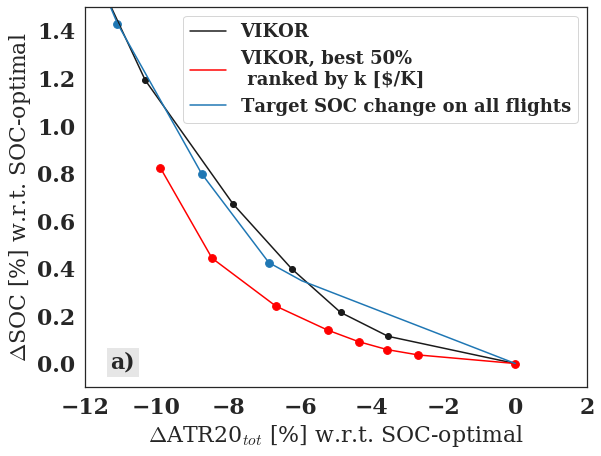

In [39]:
x = [TOT_ATR20TOT_change_atr.mean().values,
     TOT_ATR20TOT_change_V02.mean().values,
     TOT_ATR20TOT_change_V04.mean().values,
     TOT_ATR20TOT_change_V06.mean().values,
     TOT_ATR20TOT_change_V07.mean().values,
     TOT_ATR20TOT_change_V08.mean().values,
     TOT_ATR20TOT_change_V09.mean().values, 0] 

y = [TOT_SOC_change_atr.mean().values,
     TOT_SOC_change_V02.mean().values,
     TOT_SOC_change_V04.mean().values,
     TOT_SOC_change_V06.mean().values,
     TOT_SOC_change_V07.mean().values,
     TOT_SOC_change_V08.mean().values,
     TOT_SOC_change_V09.mean().values, 0] 

x_f = [TOT_ATR20TOT_change_f30.mean().values,
       TOT_ATR20TOT_change_f20.mean().values,
       TOT_ATR20TOT_change_f10.mean().values,
       TOT_ATR20TOT_change_f05.mean().values,
       TOT_ATR20TOT_change_h71.mean().values, 0] 

y_f = [TOT_SOC_change_f30.mean().values,
       TOT_SOC_change_f20.mean().values,
       TOT_SOC_change_f10.mean().values,
       TOT_SOC_change_f05.mean().values,
       TOT_SOC_change_h71.mean().values, 0] 

x_top = [Top50_TOT_ATR20TOT_change_atr.mean().values,
     Top50_TOT_ATR20TOT_change_V02.mean().values,
     Top50_TOT_ATR20TOT_change_V04.mean().values,
     Top50_TOT_ATR20TOT_change_V06.mean().values,
     Top50_TOT_ATR20TOT_change_V07.mean().values,
     Top50_TOT_ATR20TOT_change_V08.mean().values,
     Top50_TOT_ATR20TOT_change_V09.mean().values, 0] 

y_top = [Top50_TOT_SOC_change_atr.mean().values,
     Top50_TOT_SOC_change_V02.mean().values,
     Top50_TOT_SOC_change_V04.mean().values,
     Top50_TOT_SOC_change_V06.mean().values,
     Top50_TOT_SOC_change_V07.mean().values,
     Top50_TOT_SOC_change_V08.mean().values,
     Top50_TOT_SOC_change_V09.mean().values, 0] 

x_f_top = [Top50_TOT_ATR20TOT_change_f30.mean().values,
           Top50_TOT_ATR20TOT_change_f20.mean().values,
           Top50_TOT_ATR20TOT_change_f10.mean().values,
           Top50_TOT_ATR20TOT_change_f05.mean().values, 0] 

y_f_top = [Top50_TOT_SOC_change_f30.mean().values,
           Top50_TOT_SOC_change_f20.mean().values,
           Top50_TOT_SOC_change_f10.mean().values,
           Top50_TOT_SOC_change_f05.mean().values, 0] 

my_stat='percent'
palette = sns.color_palette("tab10")

fig, ax0 = plt.subplots(figsize=(9,7))

labels = ['Climate-optimal ',
          '$w$=0.2', 
          '$w$=0.4', 
          '$w$=0.6', 
          '$w$=0.7', 
          '$w$=0.8', 
          '$w$=0.9', 
          'Cost-optimal']

labels_f = ['+3.0%', '+2.0%', '+1.0%', '+0.5%']

for i, label in enumerate(labels):
    plt.scatter(x[i], y[i], color='k')
    plt.scatter(x_top[i], y_top[i], color='red', s=60)
    #if i==6:
    #    plt.annotate(label, (x[i]+0.2, y[i]), fontsize=16)
    #else:
    #    plt.annotate(label, (x[i], y[i]+0.1), fontsize=16)

#plt.plot(x_min,y_min, 'k')  
#plt.plot(x_max,y_max, 'k')  


for i, label in enumerate(labels_f):    
    plt.scatter(x_f[i], y_f[i], color='tab:blue', s=60)   
    
#for i in range(4):
#    plt.scatter(x_f_top[i],y_f_top[i], color='k', s=60)   

plt.plot(x,y, 'k', label='VIKOR')      
plt.plot(x_top,y_top, color='red', label='VIKOR, best 50% \n ranked by k [$/K]')    
plt.plot(x_f,y_f, color='tab:blue', label='Target SOC change on all flights')    
#plt.plot(x_f_top,y_f_top, color='tab:green')    

plt.xlim([-12, 2])
plt.ylim([-0.1, 1.5])
plt.xlabel(r'$\Delta$ATR20$_{tot}$ [%] w.r.t. SOC-optimal', fontsize=22)
plt.ylabel(r'$\Delta$SOC [%] w.r.t. SOC-optimal', fontsize=22)
#plt.xticks(np.arange(0,2,0.5))
ax0.xaxis.set_tick_params(labelsize='22')
ax0.yaxis.set_tick_params(labelsize='22')
ax0.annotate('a)',xy=(0.05, 0.05), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"), fontsize=22)

#plt.gca().yaxis.grid(True)
plt.legend(prop={'size': 18}, ncol=1)
plt.show()

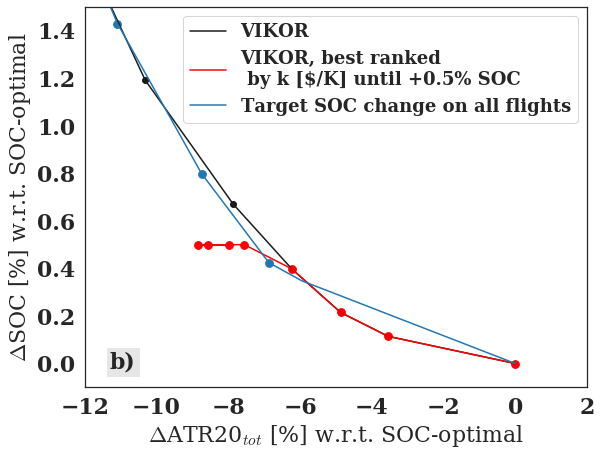

In [40]:
x = [TOT_ATR20TOT_change_atr.mean().values,
     TOT_ATR20TOT_change_V02.mean().values,
     TOT_ATR20TOT_change_V04.mean().values,
     TOT_ATR20TOT_change_V06.mean().values,
     TOT_ATR20TOT_change_V07.mean().values,
     TOT_ATR20TOT_change_V08.mean().values,
     TOT_ATR20TOT_change_V09.mean().values, 0] 

y = [TOT_SOC_change_atr.mean().values,
     TOT_SOC_change_V02.mean().values,
     TOT_SOC_change_V04.mean().values,
     TOT_SOC_change_V06.mean().values,
     TOT_SOC_change_V07.mean().values,
     TOT_SOC_change_V08.mean().values,
     TOT_SOC_change_V09.mean().values, 0] 

x_f = [TOT_ATR20TOT_change_f30.mean().values,
       TOT_ATR20TOT_change_f20.mean().values,
       TOT_ATR20TOT_change_f10.mean().values,
       TOT_ATR20TOT_change_f05.mean().values,
       TOT_ATR20TOT_change_h71.mean().values, 0] 

y_f = [TOT_SOC_change_f30.mean().values,
       TOT_SOC_change_f20.mean().values,
       TOT_SOC_change_f10.mean().values,
       TOT_SOC_change_f05.mean().values,
       TOT_SOC_change_h71.mean().values, 0] 

x_top = [Until05_TOT_ATR20TOT_change_atr.mean().values,
     Until05_TOT_ATR20TOT_change_V02.mean().values,
     Until05_TOT_ATR20TOT_change_V04.mean().values,
     Until05_TOT_ATR20TOT_change_V06.mean().values,
     Until05_TOT_ATR20TOT_change_V07.mean().values,
     Until05_TOT_ATR20TOT_change_V08.mean().values,
     Until05_TOT_ATR20TOT_change_V09.mean().values, 0] 

y_top = [Until05_TOT_SOC_change_atr.mean().values,
     Until05_TOT_SOC_change_V02.mean().values,
     Until05_TOT_SOC_change_V04.mean().values,
     Until05_TOT_SOC_change_V06.mean().values,
     Until05_TOT_SOC_change_V07.mean().values,
     Until05_TOT_SOC_change_V08.mean().values,
     Until05_TOT_SOC_change_V09.mean().values, 0] 

x_f_top = [Until05_TOT_ATR20TOT_change_f30.mean().values,
           Until05_TOT_ATR20TOT_change_f20.mean().values,
           Until05_TOT_ATR20TOT_change_f10.mean().values,
           Until05_TOT_ATR20TOT_change_f05.mean().values, 0] 

y_f_top = [Until05_TOT_SOC_change_f30.mean().values,
           Until05_TOT_SOC_change_f20.mean().values,
           Until05_TOT_SOC_change_f10.mean().values,
           Until05_TOT_SOC_change_f05.mean().values, 0] 

my_stat='percent'
palette = sns.color_palette("tab10")

fig, ax0 = plt.subplots(figsize=(9,7))

labels = ['Climate-optimal ',
          '$w$=0.2', 
          '$w$=0.4', 
          '$w$=0.6', 
          '$w$=0.7', 
          '$w$=0.8', 
          '$w$=0.9', 
          'Cost-optimal']

labels_f = ['+3.0%', '+2.0%', '+1.0%', '+0.5%']

for i, label in enumerate(labels):
    plt.scatter(x[i], y[i], color='k')
    plt.scatter(x_top[i], y_top[i], color='red', s=60)
    #if i==6:
    #    plt.annotate(label, (x[i]+0.2, y[i]), fontsize=16)
    #else:
    #    plt.annotate(label, (x[i], y[i]+0.1), fontsize=16)

#plt.plot(x_min,y_min, 'k')  
#plt.plot(x_max,y_max, 'k')  


for i, label in enumerate(labels_f):    
    plt.scatter(x_f[i], y_f[i], color='tab:blue', s=60)   
    
#for i in range(4):
#    plt.scatter(x_f_top[i],y_f_top[i], color='k', s=60)   

plt.plot(x,y, 'k', label='VIKOR')      
plt.plot(x_top,y_top, color='red', label='VIKOR, best ranked \n by k [$/K] until +0.5% SOC')    
plt.plot(x_f,y_f, color='tab:blue', label='Target SOC change on all flights')    
#plt.plot(x_f_top,y_f_top, color='tab:green')    

plt.xlim([-12, 2])
plt.ylim([-0.1, 1.5])
plt.xlabel(r'$\Delta$ATR20$_{tot}$ [%] w.r.t. SOC-optimal', fontsize=22)
plt.ylabel(r'$\Delta$SOC [%] w.r.t. SOC-optimal', fontsize=22)
#plt.xticks(np.arange(0,2,0.5))
ax0.xaxis.set_tick_params(labelsize='22')
ax0.yaxis.set_tick_params(labelsize='22')
ax0.annotate('b)',xy=(0.05, 0.05), xycoords="axes fraction", weight='bold', bbox=dict(fc="0.9"), fontsize=22)

#plt.gca().yaxis.grid(True)
plt.legend(prop={'size': 18}, ncol=1)
plt.show()

# Tables in GMDD manuscript

In [41]:
atr_list = [TOT_ATR20TOT_change_atr,
            TOT_ATR20TOT_change_V02,
            TOT_ATR20TOT_change_V04,
            TOT_ATR20TOT_change_V06,
            TOT_ATR20TOT_change_V07,
            TOT_ATR20TOT_change_V08,
            TOT_ATR20TOT_change_V09] 

ds_atr_list = xr.concat(atr_list, 'strategy')
ds_atr_list.assign_coords({'strategy':['atr','V02','V04','V06','V07','V08','V09']})

soc_list = [TOT_SOC_change_atr,
            TOT_SOC_change_V02,
            TOT_SOC_change_V04,
            TOT_SOC_change_V06,
            TOT_SOC_change_V07,
            TOT_SOC_change_V08,
            TOT_SOC_change_V09] 

ds_soc_list = xr.concat(soc_list, 'strategy')
ds_soc_list.assign_coords({'strategy':['atr','V02','V04','V06','V07','V08','V09']})

fuel_list = [TOT_fuel_change_atr,
            TOT_fuel_change_V02,
            TOT_fuel_change_V04,
            TOT_fuel_change_V06,
            TOT_fuel_change_V07,
            TOT_fuel_change_V08,
            TOT_fuel_change_V09] 

ds_fuel_list = xr.concat(fuel_list, 'strategy')
ds_fuel_list.assign_coords({'strategy':['atr','V02','V04','V06','V07','V08','V09']})

time_list = [TOT_time_change_atr,
            TOT_time_change_V02,
            TOT_time_change_V04,
            TOT_time_change_V06,
            TOT_time_change_V07,
            TOT_time_change_V08,
            TOT_time_change_V09] 

ds_time_list = xr.concat(time_list, 'strategy')
ds_time_list.assign_coords({'strategy':['atr','V02','V04','V06','V07','V08','V09']})

k_list = [coeff_K_atr,
          coeff_K_V02,
          coeff_K_V04,
          coeff_K_V06,
          coeff_K_V07,
          coeff_K_V08,
          coeff_K_V09] 

ds_k_list = xr.concat(k_list, 'strategy')
ds_k_list.assign_coords({'strategy':['atr','V02','V04','V06','V07','V08','V09']})

atr_column=[]
soc_column=[]
fuel_column=[]
time_column=[]
k_column=[]

for i in range(len(ds_soc_list.strategy)):
    atr_row = ds_atr_list.isel(strategy=i)
    soc_row = ds_soc_list.isel(strategy=i)
    fuel_row = ds_fuel_list.isel(strategy=i)
    time_row = ds_time_list.isel(strategy=i)
    k_row = ds_k_list.isel(strategy=i)

    atr_row_string = '{:+6.1f}({:+6.1f},{:+6.1f})'.format(atr_row.mean(dim='time').values, atr_row.min(dim='time').values, atr_row.max(dim='time').values)
    soc_row_string = '{:+6.2f}({:+6.2f},{:+6.2f})'.format(soc_row.mean(dim='time').values, soc_row.min(dim='time').values, soc_row.max(dim='time').values)
    fuel_row_string = '{:+6.2f}({:+6.2f},{:+6.2f})'.format(fuel_row.mean(dim='time').values, fuel_row.min(dim='time').values, fuel_row.max(dim='time').values)
    time_row_string = '{:+6.2f}({:+6.2f},{:+6.2f})'.format(time_row.mean(dim='time').values, time_row.min(dim='time').values, time_row.max(dim='time').values)
    k_row_string = '{:9.2e}({:9.2e},{:9.2e})'.format(k_row.mean(dim='time').values, k_row.min(dim='time').values, k_row.max(dim='time').values)

    atr_column.append(atr_row_string)
    soc_column.append(soc_row_string)
    fuel_column.append(fuel_row_string)
    time_column.append(time_row_string)
    k_column.append(k_row_string)

head_list = ['Climate-optimal ',
          'VIKOR $w$=0.2', 
          'VIKOR $w$=0.4', 
          'VIKOR $w$=0.6', 
          'VIKOR $w$=0.7', 
          'VIKOR $w$=0.8', 
          'VIKOR $w$=0.9']

rows = pd.DataFrame([head_list, atr_column, soc_column, fuel_column, time_column, k_column]).T.values.tolist()

table = Texttable()
table.set_cols_dtype(['e'] * 6)
table.set_deco(Texttable.VLINES)
table.add_rows(rows)

print('\nTexttable Table:')
print(table.draw())

print('\nTexttable Latex:')
print(latextable.draw_latex(table, caption="Sum of ..."))


Texttable Table:
 Climate-   |    -14.4(   |    +3.04(   |  +8.14( +2. |    +1.01(   |  3.95e+12(
  optimal   |   -29.2,    |   +1.32,    | 41,+15.19)  |   +0.59,    | 1.58e+12, 
            |    -6.7)    |   +5.00)    |             |   +1.52)    | 1.33e+13) 
VIKOR       |  -12.8(     |  +2.00(     |  +5.72( +1. |  +0.51(     |  2.94e+12(
$w$=0.2     | -26.0,      | +0.72,      | 38,+11.18)  | +0.07,      | 1.07e+12, 
            | -5.9)       | +3.52)      |             | +0.98)      | 1.05e+13) 
VIKOR       |  -10.3(     |  +1.19(     |  +3.50(     |  +0.27(     |  2.21e+12(
$w$=0.4     | -21.1,      | +0.42,      | +0.70,      | +0.01,      | 6.05e+11, 
            | -4.7)       | +2.56)      | +8.28)      | +0.57)      | 9.37e+12) 
VIKOR       |   -7.9(     |  +0.67(     |  +1.86(     |  +0.20(     |  1.66e+12(
$w$=0.6     | -13.8,      | +0.21,      | +0.30,      | -0.01,      | 4.65e+11, 
            | -4.0)       | +1.52)      | +5.07)      | +0.34)      | 8.10e+12) 
VIKOR     

In [42]:
atr_list = [TOT_ATR20TOT_change_f30,
            TOT_ATR20TOT_change_f20,
            TOT_ATR20TOT_change_f10,
            TOT_ATR20TOT_change_f05,
            TOT_ATR20TOT_change_h71] 

ds_atr_list = xr.concat(atr_list, 'strategy')

soc_list = [TOT_SOC_change_f30,
            TOT_SOC_change_f20,
            TOT_SOC_change_f10,
            TOT_SOC_change_f05,
            TOT_SOC_change_h71] 

ds_soc_list = xr.concat(soc_list, 'strategy')

fuel_list = [TOT_fuel_change_f30,
             TOT_fuel_change_f20,
             TOT_fuel_change_f10,
             TOT_fuel_change_f05,
             TOT_fuel_change_h71] 

ds_fuel_list = xr.concat(fuel_list, 'strategy')

time_list = [TOT_time_change_f30,
             TOT_time_change_f20,
             TOT_time_change_f10,
             TOT_time_change_f05,
             TOT_time_change_h71] 

ds_time_list = xr.concat(time_list, 'strategy')

k_list = [coeff_K_f30,
          coeff_K_f20,
          coeff_K_f10,
          coeff_K_f05,
          coeff_K_h71] 

ds_k_list = xr.concat(k_list, 'strategy')

atr_column=[]
soc_column=[]
fuel_column=[]
time_column=[]
k_column=[]

for i in range(len(ds_soc_list.strategy)):
    atr_row = ds_atr_list.isel(strategy=i)
    soc_row = ds_soc_list.isel(strategy=i)
    fuel_row = ds_fuel_list.isel(strategy=i)
    time_row = ds_time_list.isel(strategy=i)
    k_row = ds_k_list.isel(strategy=i)

    atr_row_string = '{:+6.1f}({:+6.1f},{:+6.1f})'.format(atr_row.mean(dim='time').values, atr_row.min(dim='time').values, atr_row.max(dim='time').values)
    soc_row_string = '{:+6.2f}({:+6.2f},{:+6.2f})'.format(soc_row.mean(dim='time').values, soc_row.min(dim='time').values, soc_row.max(dim='time').values)
    fuel_row_string = '{:+6.2f}({:+6.2f},{:+6.2f})'.format(fuel_row.mean(dim='time').values, fuel_row.min(dim='time').values, fuel_row.max(dim='time').values)
    time_row_string = '{:+6.2f}({:+6.2f},{:+6.2f})'.format(time_row.mean(dim='time').values, time_row.min(dim='time').values, time_row.max(dim='time').values)
    k_row_string = '{:9.2e}({:9.2e},{:9.2e})'.format(k_row.mean(dim='time').values, k_row.min(dim='time').values, k_row.max(dim='time').values)

    atr_column.append(atr_row_string)
    soc_column.append(soc_row_string)
    fuel_column.append(fuel_row_string)
    time_column.append(time_row_string)
    k_column.append(k_row_string)

head_list = ['+3.0% SOC', '+2.0%  SOC', '+1.0%  SOC', '+0.5% SOC', 'VIKOR $w$=0.7, +1.0%  SOC']


rows = pd.DataFrame([head_list, atr_column, soc_column, fuel_column, time_column, k_column]).T.values.tolist()

table = Texttable()
table.set_cols_dtype(['e'] * 6)
table.set_deco(Texttable.VLINES)
table.add_rows(rows)

print('\nTexttable Table:')
print(table.draw())

print('\nTexttable Latex:')
print(latextable.draw_latex(table, caption="Sum of ..."))


Texttable Table:
 +3.0% SOC  |    -12.5(   |    +1.92(   |    +5.47(   |    +0.51(   |  2.90e+12(
            |   -25.2,    |   +1.00,    |   +1.79,    |   -0.05,    | 1.22e+12, 
            |    -6.3)    |   +2.82)    |   +9.55)    |   +0.91)    | 9.67e+12) 
+2.0%  SOC  |  -11.1(     |  +1.43(     |  +4.04(     |  +0.39(     |  2.44e+12(
            | -21.5,      | +0.82,      | +1.34,      | -0.11,      | 9.40e+11, 
            | -5.7)       | +1.96)      | +6.94)      | +0.72)      | 8.45e+12) 
+1.0%  SOC  |   -8.7(     |  +0.80(     |  +2.14(     |  +0.26(     |  1.79e+12(
            | -14.9,      | +0.59,      | +0.82,      | -0.13,      | 6.72e+11, 
            | -3.4)       | +0.98)      | +3.59)      | +0.52)      | 7.08e+12) 
+0.5% SOC   |   -6.9(     |  +0.42(     |  +1.02(     |  +0.19(     |  1.27e+12(
            | -12.8,      | +0.36,      | +0.39,      | -0.06,      | 3.89e+11, 
            | -2.0)       | +0.50)      | +1.90)      | +0.36)      | 6.13e+12) 
VIKOR     